# DYNAMIC NELSON SIEGEL 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1-Libraries" data-toc-modified-id="1-Libraries-1">1 Libraries</a></span></li><li><span><a href="#2-Parameters" data-toc-modified-id="2-Parameters-2">2 Parameters</a></span></li><li><span><a href="#3-Import" data-toc-modified-id="3-Import-3">3 Import</a></span></li><li><span><a href="#4-Stationarity" data-toc-modified-id="4-Stationarity-4">4 Stationarity</a></span><ul class="toc-item"><li><span><a href="#4.1-Augemented-Dickey-Fuller-Test" data-toc-modified-id="4.1-Augemented-Dickey-Fuller-Test-4.1">4.1 Augemented Dickey-Fuller Test</a></span></li><li><span><a href="#4.2-Original-Series" data-toc-modified-id="4.2-Original-Series-4.2">4.2 Original Series</a></span></li><li><span><a href="#4.3-First-Differenced-Series" data-toc-modified-id="4.3-First-Differenced-Series-4.3">4.3 First Differenced Series</a></span></li><li><span><a href="#4.4-Fractional-Differenced-Series" data-toc-modified-id="4.4-Fractional-Differenced-Series-4.4">4.4 Fractional Differenced Series</a></span></li></ul></li><li><span><a href="#5-Causality" data-toc-modified-id="5-Causality-5">5 Causality</a></span><ul class="toc-item"><li><span><a href="#5.1-Granger-Causality-Test" data-toc-modified-id="5.1-Granger-Causality-Test-5.1">5.1 Granger-Causality Test</a></span></li><li><span><a href="#5.2-Original-Series" data-toc-modified-id="5.2-Original-Series-5.2">5.2 Original Series</a></span></li></ul></li><li><span><a href="#6-Model" data-toc-modified-id="6-Model-6">6 Model</a></span><ul class="toc-item"><li><span><a href="#6.1-Train-Test-Yields" data-toc-modified-id="6.1-Train-Test-Yields-6.1">6.1 Train-Test Yields</a></span></li><li><span><a href="#6.2-Train-Test-Scores" data-toc-modified-id="6.2-Train-Test-Scores-6.2">6.2 Train-Test Scores</a></span></li><li><span><a href="#6.3-AR-Model" data-toc-modified-id="6.3-AR-Model-6.3">6.3 AR-Model</a></span></li><li><span><a href="#6.4-VAR-Model" data-toc-modified-id="6.4-VAR-Model-6.4">6.4 VAR-Model</a></span></li></ul></li><li><span><a href="#7-Back-Transform" data-toc-modified-id="7-Back-Transform-7">7 Back-Transform</a></span><ul class="toc-item"><li><span><a href="#7.1-Nelson-Siegel" data-toc-modified-id="7.1-Nelson-Siegel-7.1">7.1 Nelson Siegel</a></span></li><li><span><a href="#7.2-Naive-Model" data-toc-modified-id="7.2-Naive-Model-7.2">7.2 Naive Model</a></span></li></ul></li><li><span><a href="#8-Model-Evaluation" data-toc-modified-id="8-Model-Evaluation-8">8 Model Evaluation</a></span><ul class="toc-item"><li><span><a href="#8.1-Results" data-toc-modified-id="8.1-Results-8.1">8.1 Results</a></span></li><li><span><a href="#8.2-Error" data-toc-modified-id="8.2-Error-8.2">8.2 Error</a></span></li></ul></li><li><span><a href="#9-Visualization" data-toc-modified-id="9-Visualization-9">9 Visualization</a></span></li></ul></div>

### 1 Libraries
***

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

warnings.simplefilter(action='ignore', category=FutureWarning)

pd.options.mode.chained_assignment = None
pd.options.display.float_format = '{:,.6f}'.format

In [2]:
import statsmodels.api as sm
import ipywidgets as widgets

# Autocorrelation
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Stationarity & causality
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests

# Model & evaluation
from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import rmse, aic
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.ar_model import AR

# Random Walk
from random import seed
from random import random
from random import gauss

In [3]:
# Visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from matplotlib.pyplot import cm
import seaborn as sns

# Date formats
years  = mdates.YearLocator()
months = mdates.MonthLocator()

years_fmt  = mdates.DateFormatter("%Y")
months_fmt = mdates.DateFormatter("%Y-%m")
days_fmt   = mdates.DateFormatter("%Y-%m-%d")

%config InlineBackend.figure_format ="retina"

### 2 Parameters
***

In [4]:
# Widget for yield curve date frequency
widget_freq = widgets.Dropdown(options=["day","week","month"],
                               value="day",
                               description="Frequency:",
                               disabled=False)

# Widget if time series shall be differenced
widget_diff = widgets.Dropdown(options=["no","yes"],
                               value="yes",
                               description="Differencing:",
                               disabled=False)


display (widget_freq)
display (widget_diff)

Dropdown(description='Frequency:', options=('day', 'week', 'month'), value='day')

Dropdown(description='Differencing:', index=1, options=('no', 'yes'), value='yes')

In [5]:
# Widget for type of model
widget_model = widgets.Dropdown(options=["ar","var"],
                                value="ar",
                                description="Model:",
                                disabled=False)

# Widget for number of lags in model
widget_lag = widgets.IntSlider(value=5, min=1, max=10, step=1,
                               description="Lags:",
                               disabled=False,
                               continuous_update=False,
                               orientation="horizontal",
                               readout=True,
                               readout_format="d")

display (widget_model)
display (widget_lag)

Dropdown(description='Model:', options=('ar', 'var'), value='ar')

IntSlider(value=5, continuous_update=False, description='Lags:', max=10, min=1)

In [6]:
freq  = widget_freq.value
diff  = widget_diff.value
model = widget_model.value
lag   = widget_lag.value

In [7]:
# Prediction
pred_start = "2017-01-01"
steps = 5

### 3 Import
***

In [8]:
# File paths
filepath_spot = "../assets/files/02-clean/"

# Filenames
filename_spot   = "spot_"+str(freq)+".csv"
filename_ns     = "nelson_siegel_"+str(freq)+".csv"
filename_tenors = "tenors.csv"

In [9]:
# Import
spot   = pd.read_csv(filepath_spot + filename_spot, index_col = 0) # Actual spot rates
ns     = pd.read_csv(filepath_spot + filename_ns, index_col = 0)
tenors = pd.read_csv(filepath_spot + "tenors.csv", index_col = 0)  # List of selected tenors

# Columns
spot.columns.name    = "spot_"+str(freq)
ns.columns.name      = "nelson_siegel_"+str(freq)
tenors.columns.name  = "tenors"

# Index
spot.index = pd.to_datetime(spot.index)
ns.index   = pd.to_datetime(ns.index)

In [10]:
# Column names
cols      = ns.columns
cols_diff = cols+"_diff"
cols_cum  = cols+"_cum"
cols_frac = cols+"_frac"
cols_len  = len(cols)

### 4 Stationarity
***

#### 4.1 Augemented Dickey-Fuller Test

The Augmented Dickey-Fuller (ADF) test can be applied, to statistically testify stationarity. The ADF basically just regresses the first differences (= Y-variable) on the original time series (= X-variable). The corresponding t-statistic gives the ADF-statistic. 
- <b>Non-Stationary:</b> If the original time series cannot signficantly help to predict the first differences, the original time series is non-stationary. 
- <b>Stationary:</b> A perfect stationary time series would be mean-reverting immediately, and thus the original time series would be able to predict the next change.

In [11]:
def ad_fuller(df, cols, confidence = "5%"):
    """
    This function applies the ADF-test for a respective time series at a certain confidence interval
    Parameters required:
    - Data frame under inspection
    - Column of time series in data frame
    - Confidence interval
    """
    
    adf_stat, threshold, p_val, stationary = list(), list(), list(), list() 

    for i in cols:
        model = adfuller(df[i])   
        
        adf_stat.append(model[0])
        threshold.append(model[4][confidence])
        p_val.append(model[1])
           
        if model[0] < model[4][confidence]: x = "stat"
        else: x = "non-stat"         
        stationary.append(x)

    eval_df = pd.DataFrame(np.zeros([len(cols),0]), index = cols)
    
    eval_df["adf_stat"] = adf_stat
    eval_df["p_val"] = p_val
    eval_df["result"] = stationary
    eval_df["crit_"+confidence] = model[4][confidence]
             
    return eval_df

#### 4.2 Original Series

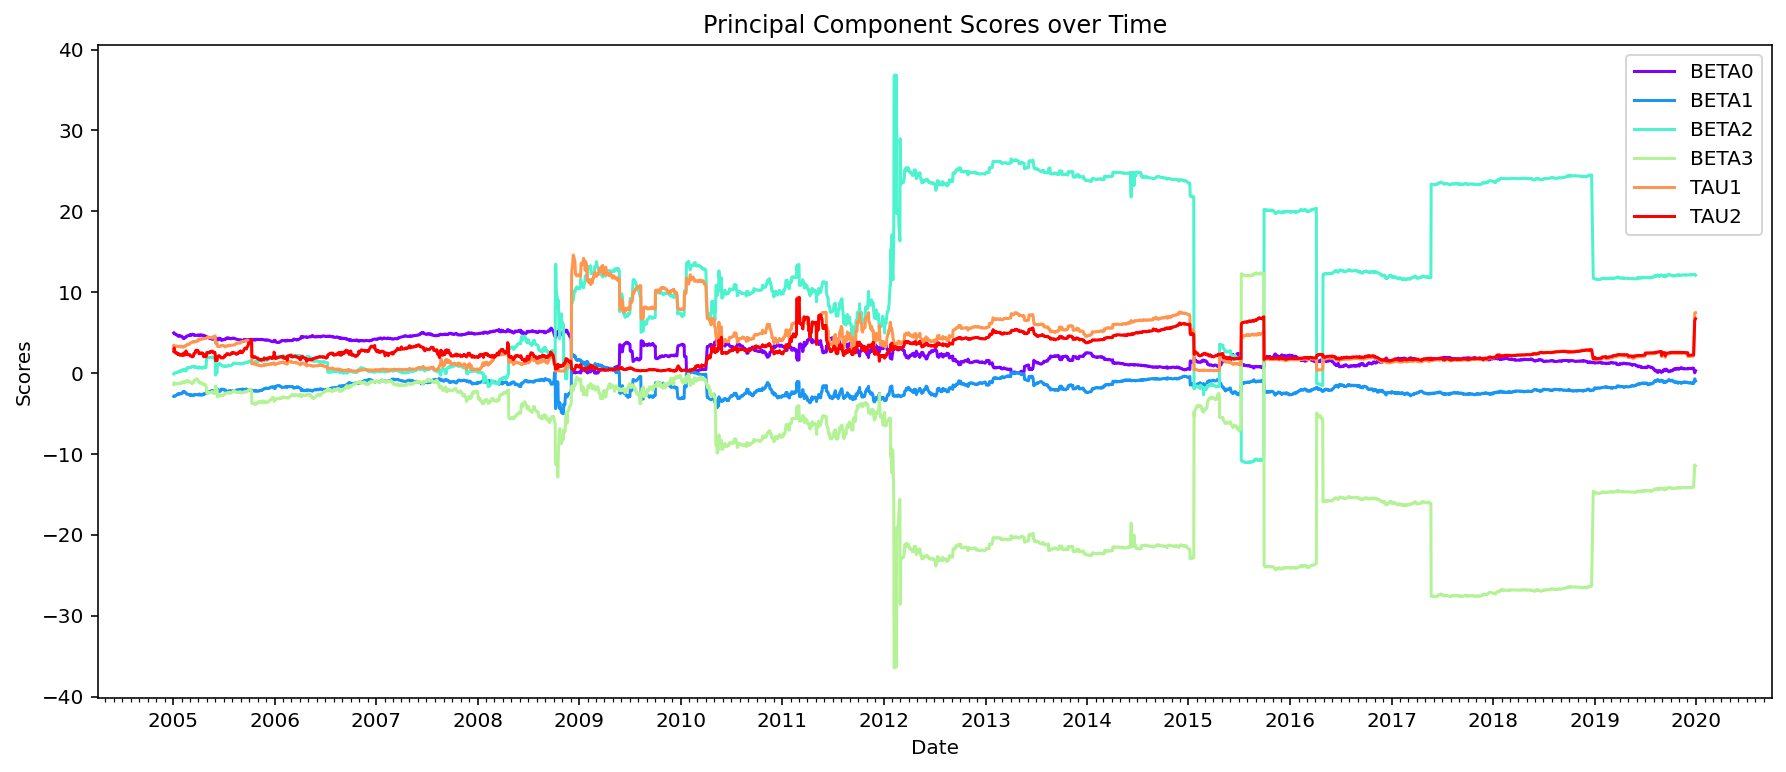

In [12]:
fig, ax = plt.subplots(1, 1, figsize = (15,6))
color=cm.rainbow(np.linspace(0,1,cols_len))

for i,c in zip(cols,color):
    plt.plot(ns[i],c=c, label=i)

# Format axis
ax.set_title ("Principal Component Scores over Time")
ax.set_xlabel ("Date")
ax.set_ylabel ("Scores")

# Format ticks
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_minor_locator(months)

ax.legend()
plt.show()

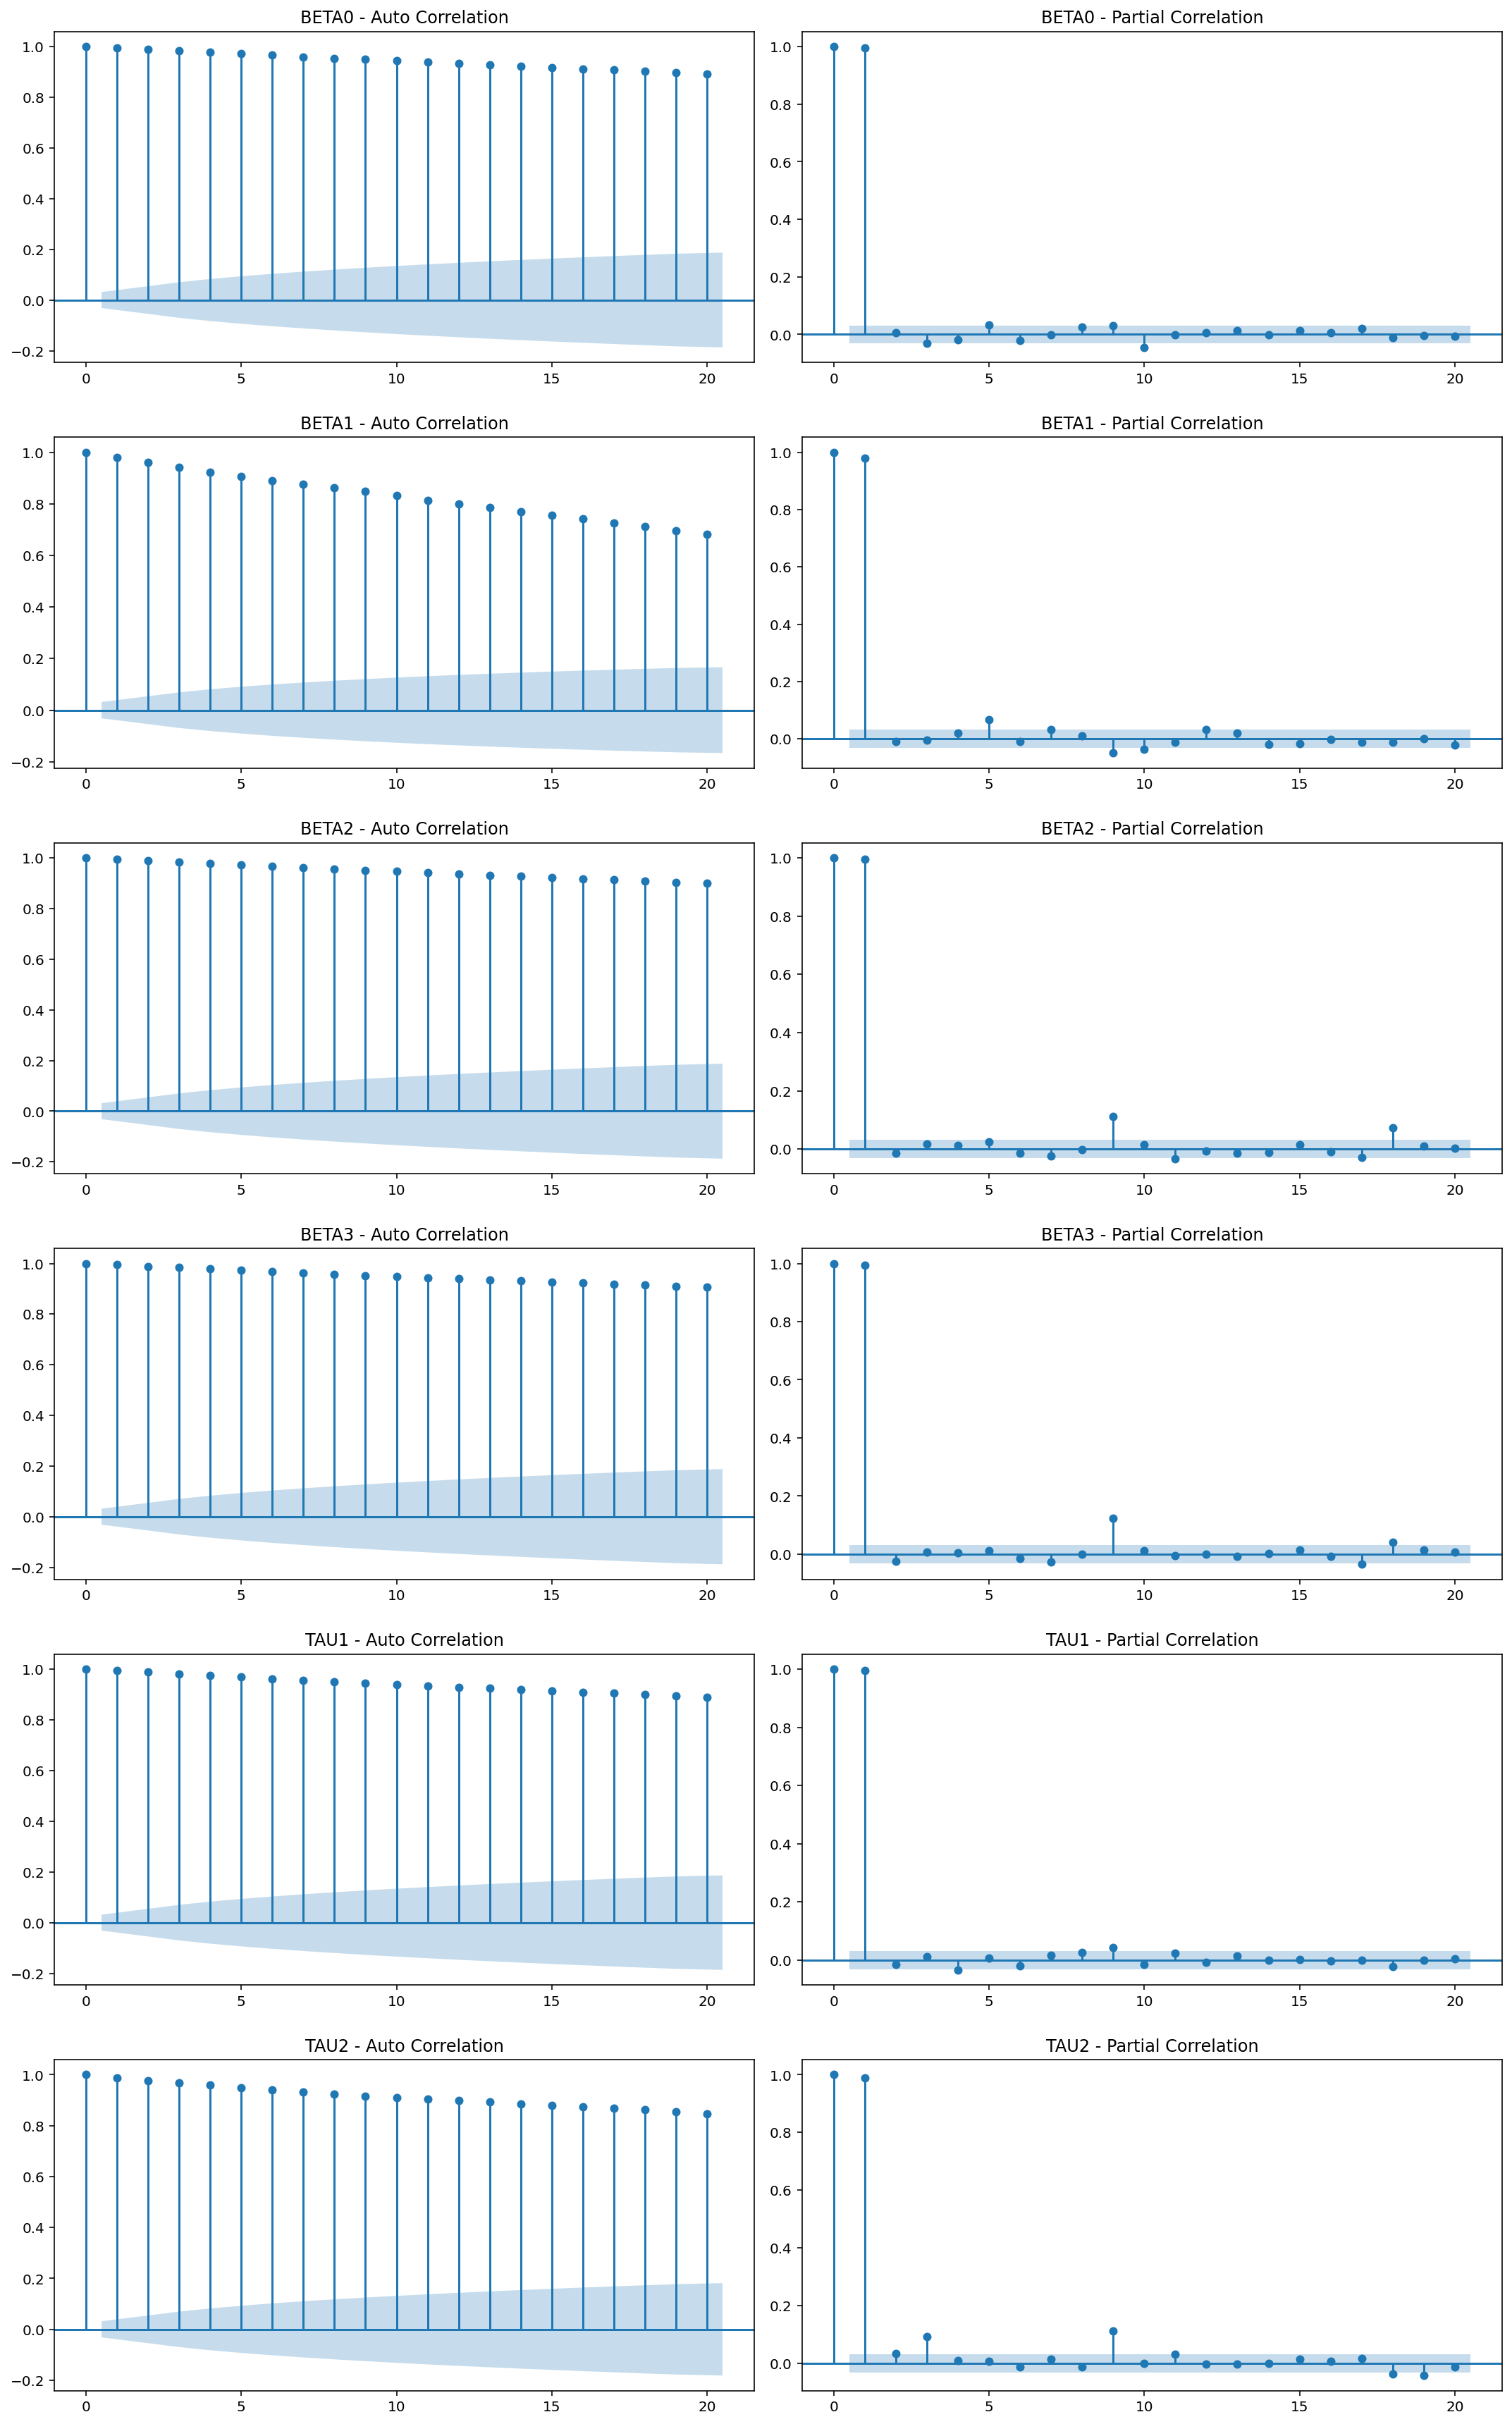

In [13]:
fig, axes = plt.subplots(cols_len, 2,figsize=(15,4*cols_len))

for i,j in enumerate (cols):
    plot_acf(ns[j].values.tolist(), lags= 20, ax=axes[i][0], title=j+" - Auto Correlation")
    plot_pacf(ns[j].values.tolist(), lags= 20, ax=axes[i][1], title=j+" - Partial Correlation")

plt.tight_layout(h_pad=2.0)
plt.show()

In [14]:
ad_fuller(df = ns, cols = cols, confidence = "5%")

,adf_stat,p_val,result,crit_5%
nelson_siegel_day,,,,
BETA0,-3.160444,0.022392,stat,-2.862300
BETA1,-5.899319,0.000000,stat,-2.862300
BETA2,-3.013477,0.033655,stat,-2.862300
BETA3,-2.994801,0.035383,stat,-2.862300
TAU1,-3.224146,0.018629,stat,-2.862300
TAU2,-3.620452,0.005382,stat,-2.862300


<div class="alert alert-block alert-info">
<b>Comment:</b> Principal component scores show trends over time, and exhibit significant autocorrelation with the first lag. Also ADF-test shows that all principal component scores are non-stationary, and thus have to be transformed. The easiest approach is to take first differences, which can eliminate any linear trend.
</div>

#### 4.3 First Differenced Series

In [15]:
for i in cols:
    ns[i+"_diff"] = ns[i].diff()    
    
ns = ns.iloc[1:]
ns.head()

nelson_siegel_day,BETA0,BETA1,BETA2,BETA3,TAU1,TAU2,BETA0_diff,BETA1_diff,BETA2_diff,BETA3_diff,TAU1_diff,TAU2_diff
2005-01-04,4.909715,-2.913265,-0.025017,-1.205345,3.337923,3.099315,-0.051989,-0.022401,0.086431,0.210592,-0.058075,0.376034
2005-01-05,4.913796,-2.911350,0.009475,-1.171742,3.317917,3.090908,0.004081,0.001915,0.034492,0.033603,-0.020006,-0.008407
2005-01-06,4.845211,-2.829891,0.017249,-1.295412,3.335752,2.579415,-0.068585,0.081459,0.007774,-0.123670,0.017835,-0.511494
2005-01-07,4.814018,-2.808103,0.009410,-1.320543,3.342847,2.549312,-0.031193,0.021788,-0.007838,-0.025131,0.007095,-0.030102
2005-01-10,4.803630,-2.812945,0.027992,-1.304500,3.327327,2.552352,-0.010388,-0.004843,0.018582,0.016043,-0.015520,0.003040


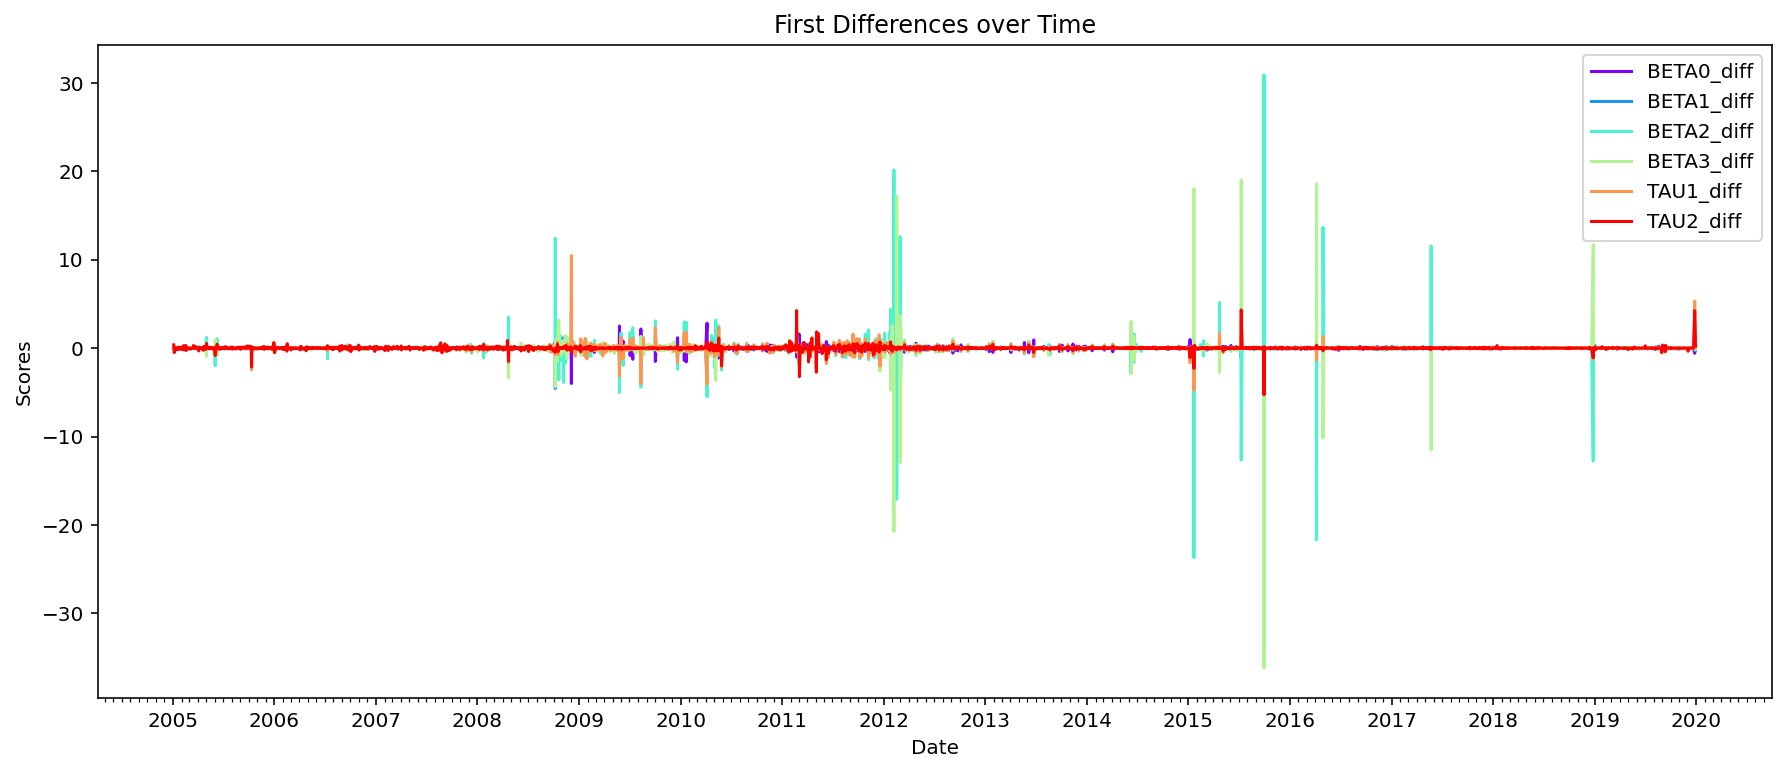

In [16]:
fig, ax = plt.subplots(1, 1, figsize = (15,6))
color=cm.rainbow(np.linspace(0,1,cols_len))

for i,c in zip(cols_diff,color):
    plt.plot(ns[i],c=c, label=i)

# Format axis
ax.set_title ("First Differences over Time")
ax.set_xlabel ("Date")
ax.set_ylabel ("Scores")

# Format ticks
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_minor_locator(months)

ax.legend()
plt.show()

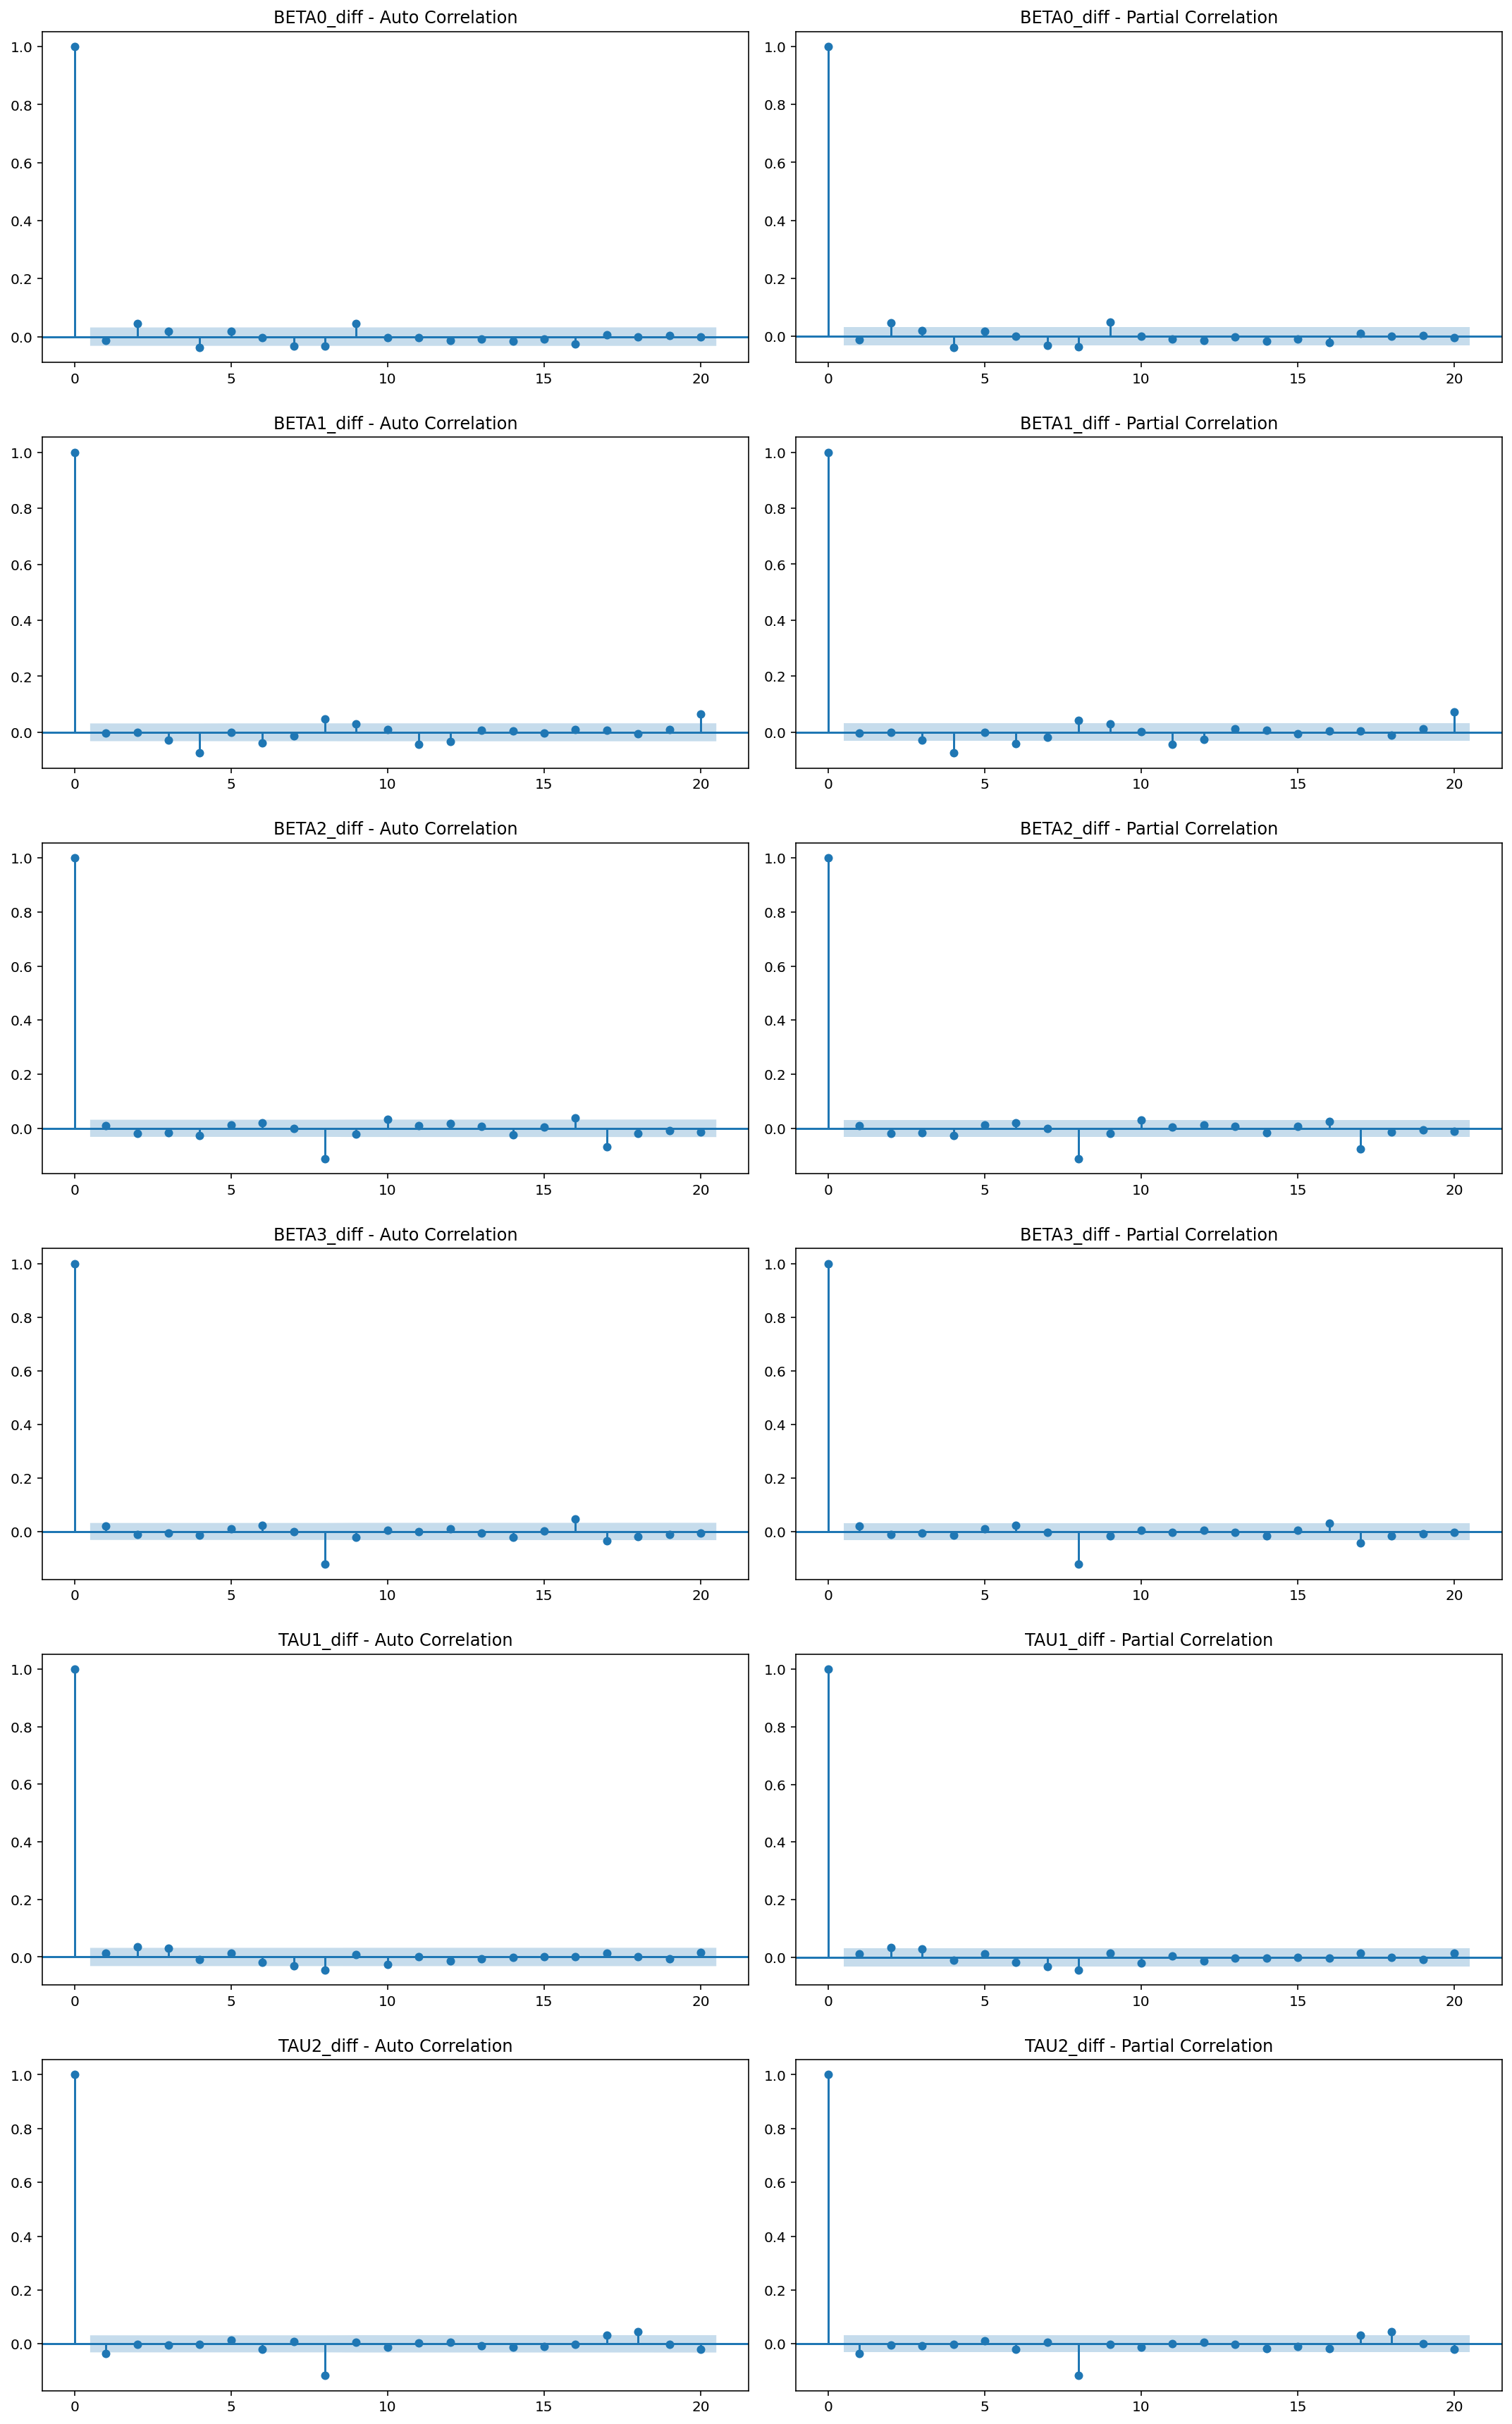

In [17]:
fig, axes = plt.subplots(cols_len, 2,figsize=(15,4*cols_len))

for i,j in enumerate (cols_diff):
    plot_acf(ns[j].values.tolist(), lags= 20, ax=axes[i][0], title=j+" - Auto Correlation")
    plot_pacf(ns[j].values.tolist(), lags= 20, ax=axes[i][1], title=j+" - Partial Correlation")

plt.tight_layout(h_pad=2.0)
plt.show()

In [18]:
ad_fuller(df = ns, cols = cols_diff, confidence = "5%")

,adf_stat,p_val,result,crit_5%
nelson_siegel_day,,,,
BETA0_diff,-20.574208,0.000000,stat,-2.862301
BETA1_diff,-13.107792,0.000000,stat,-2.862301
BETA2_diff,-16.252790,0.000000,stat,-2.862301
BETA3_diff,-24.360849,0.000000,stat,-2.862301
TAU1_diff,-22.586189,0.000000,stat,-2.862301
TAU2_diff,-11.530941,0.000000,stat,-2.862301


<div class="alert alert-block alert-info">
<b>Comment:</b> After taking the frist differences, all PC-scpres seem to be stationary by applying ADF. Additionally the autocorrelation graphs show, that any significance of lag-terms has been removed through this transformation as well.
</div>

#### 4.4 Fractional Differenced Series

In [19]:
def fast_fracdiff(x, d):
    import pylab as pl
    T = len(x)
    np2 = int(2 ** np.ceil(np.log2(2 * T - 1)))
    k = np.arange(1, T) 
    b = (1,) + tuple(np.cumprod((k - d - 1) / k))
    z = (0,) * (np2 - T)
    z1 = b + z
    z2 = tuple(x) + z
    dx = pl.ifft(pl.fft(z1) * pl.fft(z2))
    return np.real(dx[0:T])

In [20]:
for i in cols:
    ns[i+"_frac"] = fast_fracdiff(x = ns[i], d = 0.15)

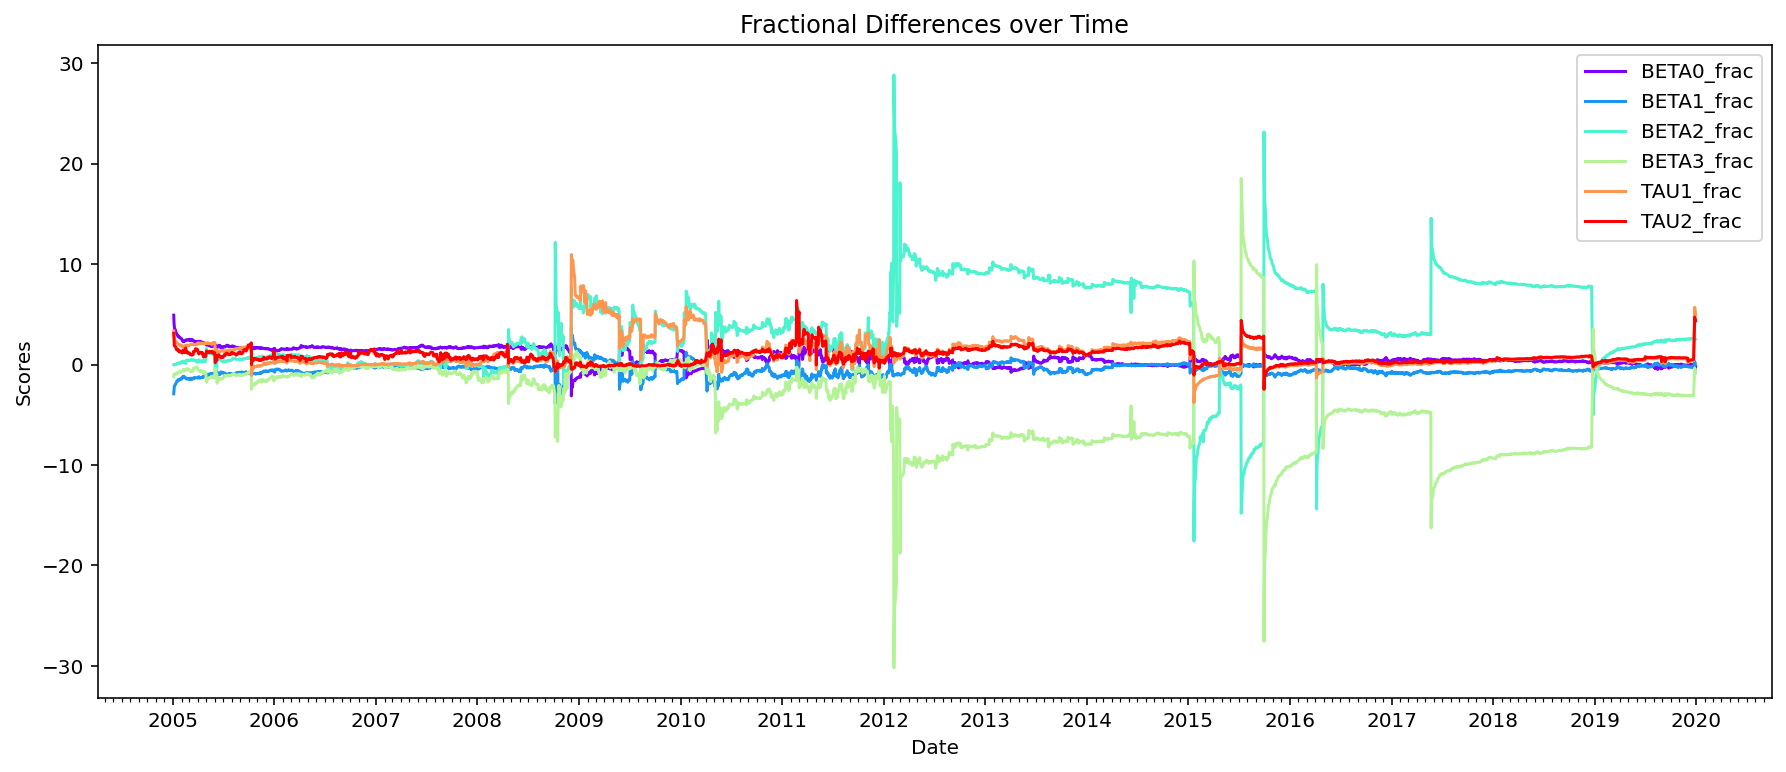

In [21]:
fig, ax = plt.subplots(1, 1, figsize = (15,6))
color=cm.rainbow(np.linspace(0,1,cols_len))

for i,c in zip(cols_frac,color):
    plt.plot(ns[i],c=c, label=i)

# Format axis
ax.set_title ("Fractional Differences over Time")
ax.set_xlabel ("Date")
ax.set_ylabel ("Scores")

# Format ticks
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_minor_locator(months)

ax.legend()
plt.show()

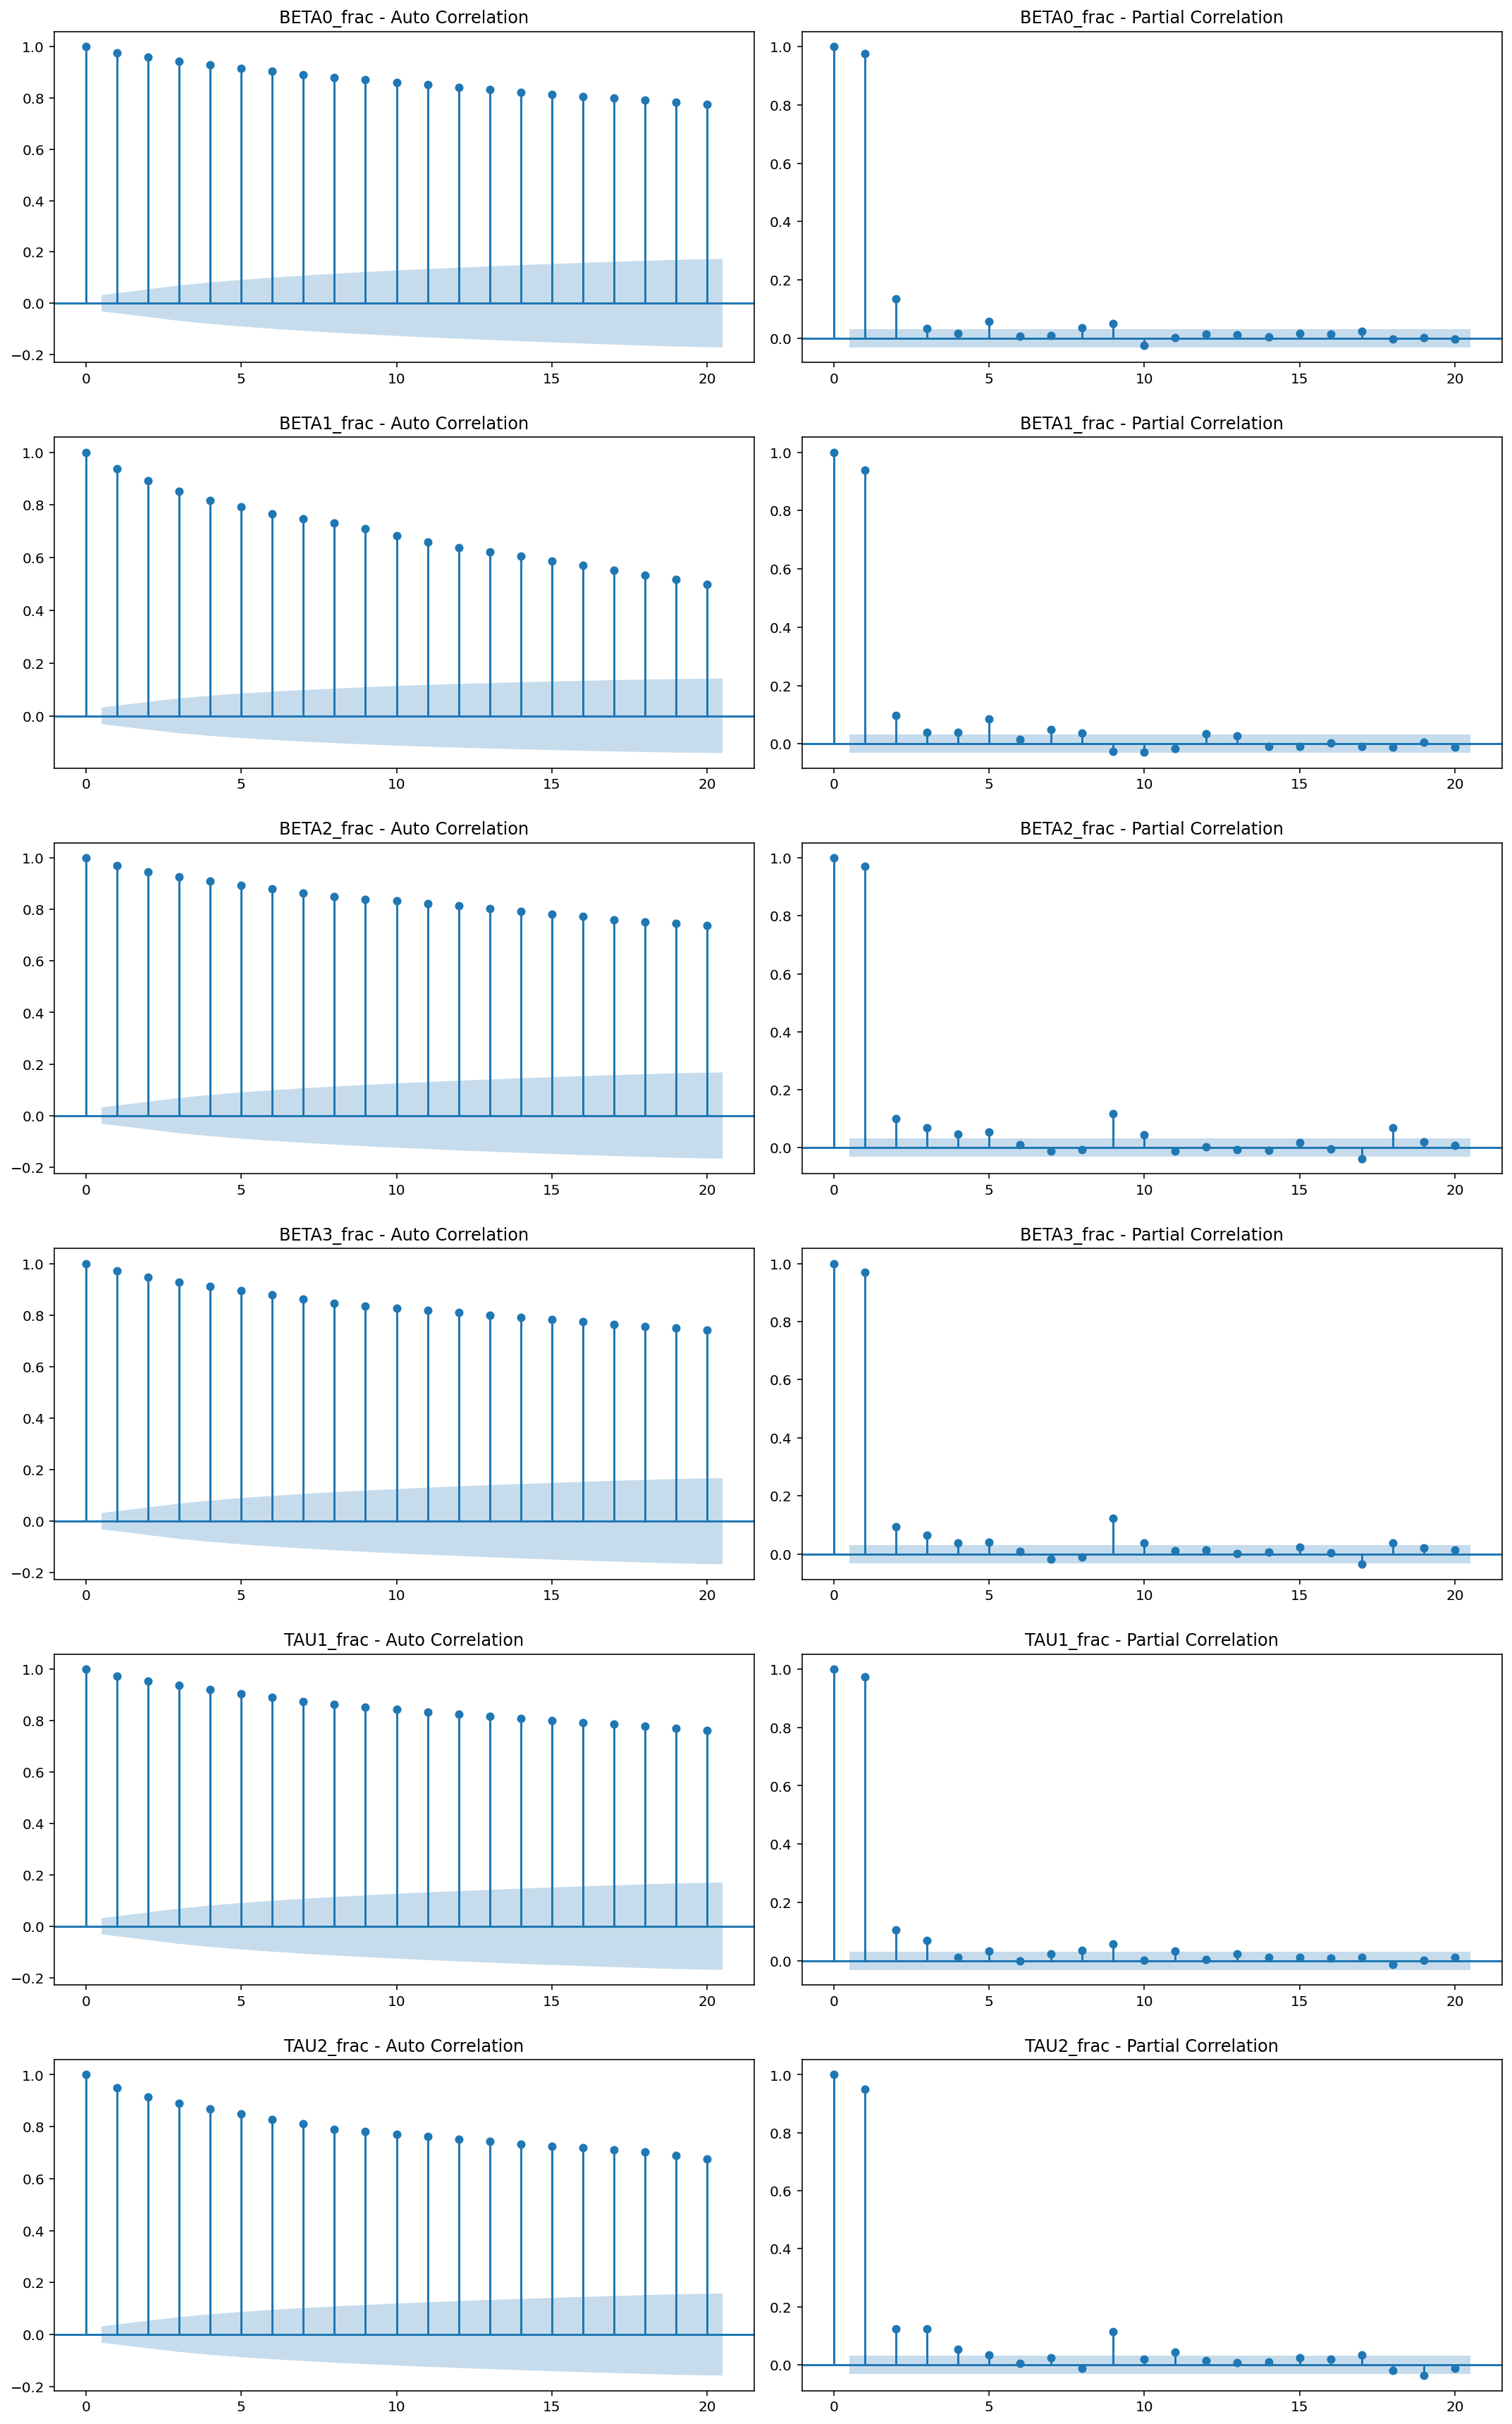

In [22]:
fig, axes = plt.subplots(cols_len, 2,figsize=(15,4*cols_len))

for i,j in enumerate (cols_frac):
    plot_acf(ns[j].values.tolist(), lags= 20, ax=axes[i][0], title=j+" - Auto Correlation")
    plot_pacf(ns[j].values.tolist(), lags= 20, ax=axes[i][1], title=j+" - Partial Correlation")

plt.tight_layout(h_pad=2.0)
plt.show()

In [23]:
ad_fuller(df = ns, cols = cols_frac, confidence = "5%")

,adf_stat,p_val,result,crit_5%
nelson_siegel_day,,,,
BETA0_frac,-4.911499,0.000033,stat,-2.862300
BETA1_frac,-7.554273,0.000000,stat,-2.862300
BETA2_frac,-4.633532,0.000112,stat,-2.862300
BETA3_frac,-4.977316,0.000025,stat,-2.862300
TAU1_frac,-4.863286,0.000041,stat,-2.862300
TAU2_frac,-4.790534,0.000057,stat,-2.862300


### 5 Causality
***

#### 5.1 Granger-Causality Test

In order for a Vector Autoregressive (VAR) model to work, the interdependencies to the endogenous variables (PC1, PC2, PC3) should be significant. To testify this assumption, the Granger Causality test can be applied. It basically regresses Y on a specified number of its own lags, and adds the first lag of another endogenous variable. An f-test is being computed that states, if any of the added endogenous variables is significant enough to help forecasting Y.

In [24]:
def granger_causality(df, Y, X, lag, test= "ssr_ftest", alpha = 0.05):

    model = grangercausalitytests(df[[Y, X]], maxlag = lag, verbose = False)
    
    lags = ["lag_"+str(i) for i in range(1, lag+1)]
    f_stat = [model[i][0][test][0] for i in range(1, lag+1)]
    p_val  = [model[i][0][test][1] for i in range(1, lag+1)]
    sign = [1 if i <alpha else 0 for i in p_val]
    
    # Output
    output_1 = pd.DataFrame(f_stat, columns = ["f_stat"], index = lags).T
    output_1["f_stat"] = Y+"_"+X
    output_1 = output_1.set_index("f_stat")
    
    output_2 = pd.DataFrame(p_val, columns = ["p_val"], index = lags).T
    output_2["p_val"] = Y+"_"+X
    output_2 = output_2.set_index("p_val")
    
    output_3 = pd.DataFrame(sign, columns = ["sign"], index = lags).T
    output_3["sign"] = Y+"_"+X
    output_3 = output_3.set_index("sign")
    
    return output_1, output_2, output_3

#### 5.2 Original Series

In [25]:
comb_x = [i if i != j else None for j in cols for i in cols]
comb_y = [j if i != j else None for j in cols for i in cols]

comb_x = list(filter(None, comb_x))
comb_y = list(filter(None, comb_y))

In [26]:
granger_df = pd.DataFrame()

for x,y in zip (comb_x,comb_y):
    new = granger_causality(ns, Y = y, X = x, lag = 5)[2]
    granger_df = pd.concat([granger_df, new], axis = 0)
    
granger_df.index.name = None
granger_df.head()

,lag_1,lag_2,lag_3,lag_4,lag_5
BETA0_BETA1,1,1,1,1,1
BETA0_BETA2,0,0,0,0,0
BETA0_BETA3,1,1,0,0,0
BETA0_TAU1,0,1,1,1,1
BETA0_TAU2,0,1,1,0,0


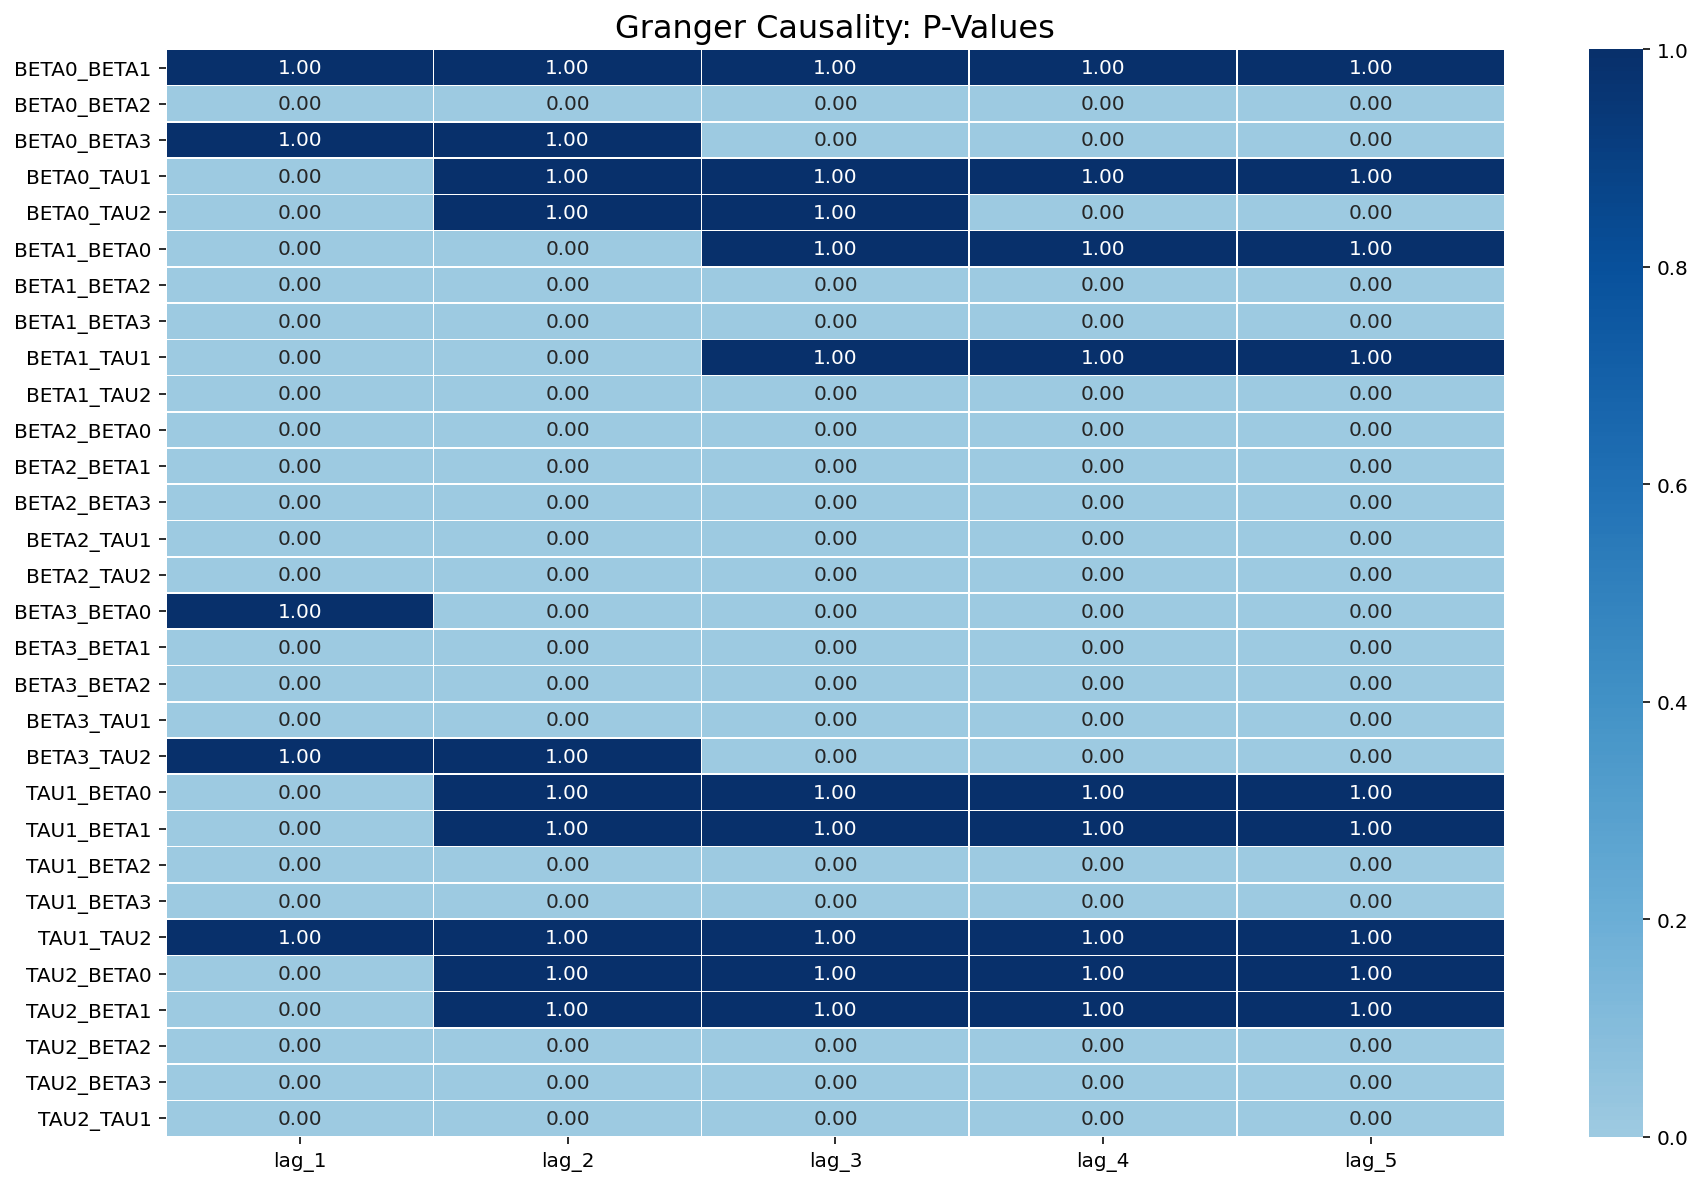

In [27]:
fig, ax = plt.subplots(1, 1, figsize = (15,10))

plt.title("Granger Causality: P-Values", fontsize = 16)
ttl = ax.title
ttl.set_position([0.5,1.05])

sns.heatmap(granger_df, 
            fmt=".2f", 
            cmap = "Blues", 
            linewidth = 0.3, 
            annot = True,
            center = 0.2)


plt.show()

### 6 Model
***

#### 6.1 Train-Test Yields

In [28]:
spot_train = spot[spot.index < pred_start]
spot_test = spot[spot.index >= pred_start]

In [29]:
# Train-set of actual spot rates
spot_train.iloc[:5,:5]

spot_day,3M,6M,1Y,2Y,3Y
2005-01-03,2.109629,2.151024,2.239782,2.430961,2.626467
2005-01-04,2.055906,2.115073,2.231982,2.457144,2.667102
2005-01-05,2.064858,2.126695,2.248179,2.479969,2.694019
2005-01-06,2.060515,2.107919,2.207488,2.415567,2.622265
2005-01-07,2.048016,2.092720,2.187889,2.390159,2.593648


In [30]:
# Test-set of actual spot rates
spot_test.iloc[:5,:5]

spot_day,3M,6M,1Y,2Y,3Y
2017-01-02,-0.791214,-0.780195,-0.790530,-0.818167,-0.774115
2017-01-03,-0.779862,-0.769149,-0.778623,-0.798726,-0.742486
2017-01-04,-0.810978,-0.794128,-0.792114,-0.796286,-0.732990
2017-01-05,-0.799905,-0.779600,-0.770749,-0.765219,-0.698431
2017-01-06,-0.790154,-0.764435,-0.748755,-0.739340,-0.674712


#### 6.2 Train-Test Scores

In [31]:
train = ns[ns.index< pred_start]
test  = ns[ns.index>=pred_start]

if diff == "yes":
    X_train = train[cols_diff]
    X_test = test[cols_diff]

else:
    X_train = train[["BETA0","BETA1","TAU1","TAU2"]]
    X_test = test[["BETA0","BETA1","TAU1","TAU2"]]
    
last_train = train.iloc[-1,:len(cols)]
last_train

nelson_siegel_day
BETA0     1.480000
BETA1    -2.500000
BETA2    12.036684
BETA3   -15.935653
TAU1      1.309443
TAU2      1.565852
Name: 2016-12-30 00:00:00, dtype: float64

In [32]:
print (f"Train set: Dates range from {train.index[0].date()} to {train.index[-1].date()}")
train[cols].tail()

Train set: Dates range from 2005-01-04 to 2016-12-30


nelson_siegel_day,BETA0,BETA1,BETA2,BETA3,TAU1,TAU2
2016-12-23,1.464912,-2.438912,12.016646,-15.956027,1.306339,1.537047
2016-12-27,1.394274,-2.376274,12.056789,-15.915005,1.253506,1.480143
2016-12-28,1.430276,-2.419276,12.016911,-15.955733,1.288866,1.523940
2016-12-29,1.395975,-2.407975,12.121079,-15.849676,1.306782,1.539156
2016-12-30,1.480000,-2.500000,12.036684,-15.935653,1.309443,1.565852


In [33]:
print (f"Test set: Dates range from {test.index[0].date()} to {test.index[-1].date()}")
test[cols].head()

Test set: Dates range from 2017-01-02 to 2019-12-30


nelson_siegel_day,BETA0,BETA1,BETA2,BETA3,TAU1,TAU2
2017-01-02,1.450341,-2.274341,11.885632,-16.084991,1.336620,1.574650
2017-01-03,1.565529,-2.377529,11.804623,-16.157943,1.320762,1.558906
2017-01-04,1.596281,-2.445281,11.821835,-16.140630,1.343626,1.582267
2017-01-05,1.592923,-2.433923,11.880932,-16.080838,1.355774,1.589151
2017-01-06,1.575260,-2.413691,11.936644,-16.024138,1.355415,1.589296


#### 6.3 AR-Model

In [34]:
pred_ar = pd.DataFrame()

for i in X_train.columns:
    model = AR(X_train[i].values)
    model_fitted = model.fit(maxlag = lag)
    
    pred = model_fitted.predict(start = len(X_train), 
                                end   = len(X_train) + steps - 1, 
                                dynamic = False)
    
    pred = pd.DataFrame(pred, columns = [i], index = spot_test.index[:steps])
    pred_ar = pd.concat([pred_ar, pred], axis = 1)
    
    print ("\n" + i)
    print (model_fitted.summary())


BETA0_diff
                               AR Model Results                               
Dep. Variable:                      y   No. Observations:                 3070
Model:                          AR(5)   Log Likelihood                1154.158
Method:                          cmle   S.D. of innovations              0.166
Date:                Wed, 06 Jan 2021   AIC                             -3.586
Time:                        12:01:41   BIC                             -3.573
Sample:                             0   HQIC                            -3.581
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0010      0.003     -0.348      0.728      -0.007       0.005
L1.y          -0.0100      0.018     -0.551      0.581      -0.045       0.025
L2.y           0.0477      0.018      2.

In [35]:
pred_ar.columns.name = "pred_spot_"+str(freq)
pred_ar.head()

pred_spot_day,BETA0_diff,BETA1_diff,BETA2_diff,BETA3_diff,TAU1_diff,TAU2_diff
2017-01-02,-0.000893,-0.003104,0.001476,-0.007368,0.002077,-0.001617
2017-01-03,-0.000378,0.003131,0.005792,-0.003494,-0.001059,-0.001319
2017-01-04,0.002534,0.001917,0.001959,-0.006450,-0.000222,0.000111
2017-01-05,-0.005049,0.007138,0.007748,-0.002216,-0.000384,-0.000174
2017-01-06,0.000666,0.000189,0.002957,-0.005598,-0.000640,0.000049


#### 6.4 VAR-Model

In [36]:
var = VAR(X_train.values)

model_fitted = var.fit(lag)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 06, Jan, 2021
Time:                     12:01:41
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -17.0999
Nobs:                     3065.00    HQIC:                  -17.3343
Log likelihood:           857.898    FPE:                2.59864e-08
AIC:                     -17.4657    Det(Omega_mle):     2.44638e-08
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const        -0.001116         0.003009           -0.371           0.711
L1.y1        -0.028373         0.061675           -0.460           0.645
L1.y2        -0.025485         0.040015           -0.637           0.524
L1.y3        -0.018688

In [37]:
pred_var = model_fitted.forecast(y = X_train[-lag:].values, steps = steps)
pred_var = pd.DataFrame(pred_var, columns = X_train.columns, index = spot_test.index[:steps])
pred_var.index = pd.to_datetime(pred_var.index)

print ("Prediction VAR-Model:")
pred_var

Prediction VAR-Model:


nelson_siegel_day,BETA0_diff,BETA1_diff,BETA2_diff,BETA3_diff,TAU1_diff,TAU2_diff
2017-01-02,0.010762,-0.003557,-0.054979,0.002163,-0.012382,-0.019490
2017-01-03,-0.009137,0.012119,0.044622,-0.044999,-0.010927,0.000029
2017-01-04,0.008202,-0.002413,-0.011475,-0.025099,-0.001582,-0.005851
2017-01-05,-0.008570,0.009443,0.043434,-0.026255,-0.004214,-0.000847
2017-01-06,0.000342,-0.001202,0.019587,-0.013289,0.002825,0.003141


### 7 Back-Transform
***

#### 7.1 Nelson Siegel

In [38]:
# Select the model type -----------------------------------------------------------
if model == "var":
    pred_scores = pred_var    
else:
    pred_scores = pred_ar


# If differenced, convert I(1) back to I(0) ---------------------------------------
if diff == "yes":
    c=0
    
    for i,j in zip (cols_cum, cols_diff):
        pred_scores[i] = pred_scores[j].cumsum()

    for i,j in zip (cols, cols_cum):
        pred_scores[i] = pred_scores[j] + last_train[c]
        c=c+1

#pred_scores = pred_scores[cols]
pred_scores.columns.name = "pred_pc_"+str(freq)
pred_scores

pred_pc_day,BETA0_diff,BETA1_diff,BETA2_diff,BETA3_diff,TAU1_diff,TAU2_diff,BETA0_cum,BETA1_cum,BETA2_cum,BETA3_cum,TAU1_cum,TAU2_cum,BETA0,BETA1,BETA2,BETA3,TAU1,TAU2
2017-01-02,-0.000893,-0.003104,0.001476,-0.007368,0.002077,-0.001617,-0.000893,-0.003104,0.001476,-0.007368,0.002077,-0.001617,1.479106,-2.503104,12.038160,-15.943021,1.311520,1.564235
2017-01-03,-0.000378,0.003131,0.005792,-0.003494,-0.001059,-0.001319,-0.001271,0.000027,0.007268,-0.010862,0.001018,-0.002936,1.478728,-2.499972,12.043952,-15.946515,1.310461,1.562915
2017-01-04,0.002534,0.001917,0.001959,-0.006450,-0.000222,0.000111,0.001262,0.001944,0.009227,-0.017312,0.000796,-0.002826,1.481262,-2.498056,12.045911,-15.952965,1.310239,1.563026
2017-01-05,-0.005049,0.007138,0.007748,-0.002216,-0.000384,-0.000174,-0.003786,0.009081,0.016975,-0.019528,0.000412,-0.003000,1.476213,-2.490918,12.053659,-15.955180,1.309856,1.562851
2017-01-06,0.000666,0.000189,0.002957,-0.005598,-0.000640,0.000049,-0.003120,0.009270,0.019931,-0.025126,-0.000228,-0.002951,1.476879,-2.490730,12.056615,-15.960779,1.309215,1.562901


In [39]:
pred_scores["BETA2"] = last_train["BETA2"]
pred_scores["BETA3"] = last_train["BETA3"]
pred_scores

pred_pc_day,BETA0_diff,BETA1_diff,BETA2_diff,BETA3_diff,TAU1_diff,TAU2_diff,BETA0_cum,BETA1_cum,BETA2_cum,BETA3_cum,TAU1_cum,TAU2_cum,BETA0,BETA1,BETA2,BETA3,TAU1,TAU2
2017-01-02,-0.000893,-0.003104,0.001476,-0.007368,0.002077,-0.001617,-0.000893,-0.003104,0.001476,-0.007368,0.002077,-0.001617,1.479106,-2.503104,12.036684,-15.935653,1.311520,1.564235
2017-01-03,-0.000378,0.003131,0.005792,-0.003494,-0.001059,-0.001319,-0.001271,0.000027,0.007268,-0.010862,0.001018,-0.002936,1.478728,-2.499972,12.036684,-15.935653,1.310461,1.562915
2017-01-04,0.002534,0.001917,0.001959,-0.006450,-0.000222,0.000111,0.001262,0.001944,0.009227,-0.017312,0.000796,-0.002826,1.481262,-2.498056,12.036684,-15.935653,1.310239,1.563026
2017-01-05,-0.005049,0.007138,0.007748,-0.002216,-0.000384,-0.000174,-0.003786,0.009081,0.016975,-0.019528,0.000412,-0.003000,1.476213,-2.490918,12.036684,-15.935653,1.309856,1.562851
2017-01-06,0.000666,0.000189,0.002957,-0.005598,-0.000640,0.000049,-0.003120,0.009270,0.019931,-0.025126,-0.000228,-0.002951,1.476879,-2.490730,12.036684,-15.935653,1.309215,1.562901


In [40]:
pred_spot = pd.DataFrame(np.zeros([steps,len(tenors)]),
                         columns = tenors["MAT_STR"],
                         index = spot_test.index[:steps])


for i,j in enumerate (tenors["MAT_NUM"]):
    for k in range (0,steps,1):

        beta_0 = pred_scores["BETA0"].iloc[k]
        beta_1 = pred_scores["BETA1"].iloc[k]
        beta_2 = pred_scores["BETA2"].iloc[k]
        beta_3 = pred_scores["BETA3"].iloc[k]
        tau_1 = pred_scores["TAU1"].iloc[k]
        tau_2 = pred_scores["TAU2"].iloc[k]
        
        term_1 = (1-np.exp(-j/tau_1))/(j/tau_1)
        term_2 = ((1-np.exp(-j/tau_1))/(j/tau_1))-np.exp(-j/tau_1)
        term_3 = ((1-np.exp(-j/tau_2))/(j/tau_2))-np.exp(-j/tau_2)
        pred_spot.iloc[k,i] = beta_0 + beta_1*term_1 + beta_2*term_2 + beta_3*term_3

pred_spot.iloc[:5,:5]

MAT_STR,3M,6M,1Y,2Y,3Y
2017-01-02,-0.934110,-0.879339,-0.830848,-0.805602,-0.745293
2017-01-03,-0.931618,-0.877106,-0.829069,-0.804365,-0.744210
2017-01-04,-0.927082,-0.872573,-0.824705,-0.800571,-0.740940
2017-01-05,-0.925426,-0.871367,-0.824383,-0.801741,-0.743155
2017-01-06,-0.924020,-0.869652,-0.822516,-0.800370,-0.742418


#### 7.2 Naive Model

In [41]:
naive = pd.DataFrame(spot_train.iloc[-1,:]).T
naive = pd.concat([naive]*steps, ignore_index=True)
naive.index = spot_test.index[:steps]

naive.columns.name = "naive_spot_"+str(freq)
naive.iloc[:5,:5]

naive_spot_day,3M,6M,1Y,2Y,3Y
2017-01-02,-0.927596,-0.871451,-0.822444,-0.800098,-0.743420
2017-01-03,-0.927596,-0.871451,-0.822444,-0.800098,-0.743420
2017-01-04,-0.927596,-0.871451,-0.822444,-0.800098,-0.743420
2017-01-05,-0.927596,-0.871451,-0.822444,-0.800098,-0.743420
2017-01-06,-0.927596,-0.871451,-0.822444,-0.800098,-0.743420


### 8 Model Evaluation
***

#### 8.1 Results

In [42]:
spot_test.columns.name = "test_spot_"+str(freq)
spot_test.iloc[:steps,:5]

test_spot_day,3M,6M,1Y,2Y,3Y
2017-01-02,-0.791214,-0.780195,-0.790530,-0.818167,-0.774115
2017-01-03,-0.779862,-0.769149,-0.778623,-0.798726,-0.742486
2017-01-04,-0.810978,-0.794128,-0.792114,-0.796286,-0.732990
2017-01-05,-0.799905,-0.779600,-0.770749,-0.765219,-0.698431
2017-01-06,-0.790154,-0.764435,-0.748755,-0.739340,-0.674712


In [43]:
pred_spot.columns.name = "pred_spot_"+str(freq)
pred_spot.iloc[:5,:5]

pred_spot_day,3M,6M,1Y,2Y,3Y
2017-01-02,-0.934110,-0.879339,-0.830848,-0.805602,-0.745293
2017-01-03,-0.931618,-0.877106,-0.829069,-0.804365,-0.744210
2017-01-04,-0.927082,-0.872573,-0.824705,-0.800571,-0.740940
2017-01-05,-0.925426,-0.871367,-0.824383,-0.801741,-0.743155
2017-01-06,-0.924020,-0.869652,-0.822516,-0.800370,-0.742418


#### 8.2 Error

In [44]:
error_act = pred_spot - spot_test.iloc[:steps,:]
error_act.index = error_act.index.date
error_act.columns.name = "err_act_"+freq
error_act.iloc[:5,:5]

err_act_day,3M,6M,1Y,2Y,3Y
2017-01-02,-0.142897,-0.099145,-0.040317,0.012565,0.028821
2017-01-03,-0.151757,-0.107958,-0.050446,-0.005639,-0.001724
2017-01-04,-0.116104,-0.078445,-0.032591,-0.004285,-0.007950
2017-01-05,-0.125521,-0.091767,-0.053634,-0.036522,-0.044724
2017-01-06,-0.133866,-0.105217,-0.073761,-0.061030,-0.067706


In [45]:
error_naive = naive - spot_test.iloc[:steps,:]
error_naive.index = error_naive.index.date
error_naive.columns.name = "err_naive_"+freq
error_naive.iloc[:5,:5]

err_naive_day,3M,6M,1Y,2Y,3Y
2017-01-02,-0.136382,-0.091256,-0.031914,0.018069,0.030695
2017-01-03,-0.147734,-0.102302,-0.043821,-0.001372,-0.000934
2017-01-04,-0.116618,-0.077323,-0.030330,-0.003812,-0.010430
2017-01-05,-0.127691,-0.091850,-0.051695,-0.034879,-0.044989
2017-01-06,-0.137442,-0.107016,-0.073689,-0.060758,-0.068708


In [46]:
mae_act    = pd.Series([abs(error_act.iloc[i,:]).mean() for i in range(steps)])
mae_naive  = pd.Series([abs(error_naive.iloc[i,:]).mean() for i in range(steps)])

err = pd.concat([mae_act, mae_naive], axis = 1)
err.columns = ["mae_act", "mae_naive"]
err.index = pred_spot.index

err

,mae_act,mae_naive
2017-01-02,0.039987,0.037848
2017-01-03,0.057435,0.058438
2017-01-04,0.064858,0.068725
2017-01-05,0.084119,0.084695
2017-01-06,0.087291,0.088344


In [47]:
file_object = open("../assets/files/04-results/nelson-siegel.txt", "a")
file_object.write(str(err))
file_object.close()

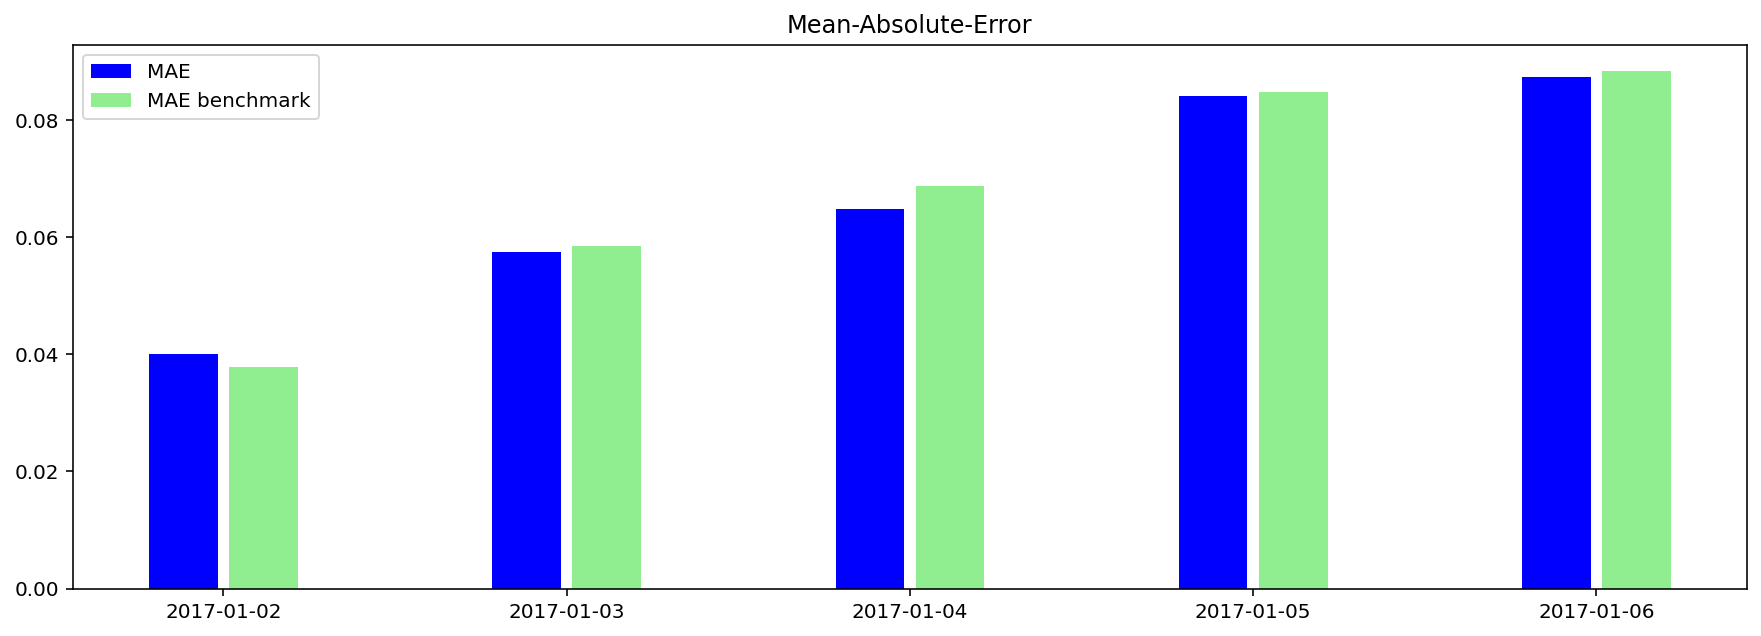

In [48]:
# Helper 
indx = np.arange(err.shape[0])
bar_width = 0.2


# Chart 
fig, ax = plt.subplots(1,1, figsize = [15,5])

ax.bar(indx - 0.05 - bar_width/3, err["mae_act"], bar_width, color = "blue", label = "MAE")
ax.bar(indx + 0.05 + bar_width/3, err["mae_naive"], bar_width, color = "lightgreen", label = "MAE benchmark")

ax.set_title("Mean-Absolute-Error")
ax.set_xticks(indx)
ax.set_xticklabels(err.index.date)
ax.legend()

plt.show()

### 9 Visualization
***

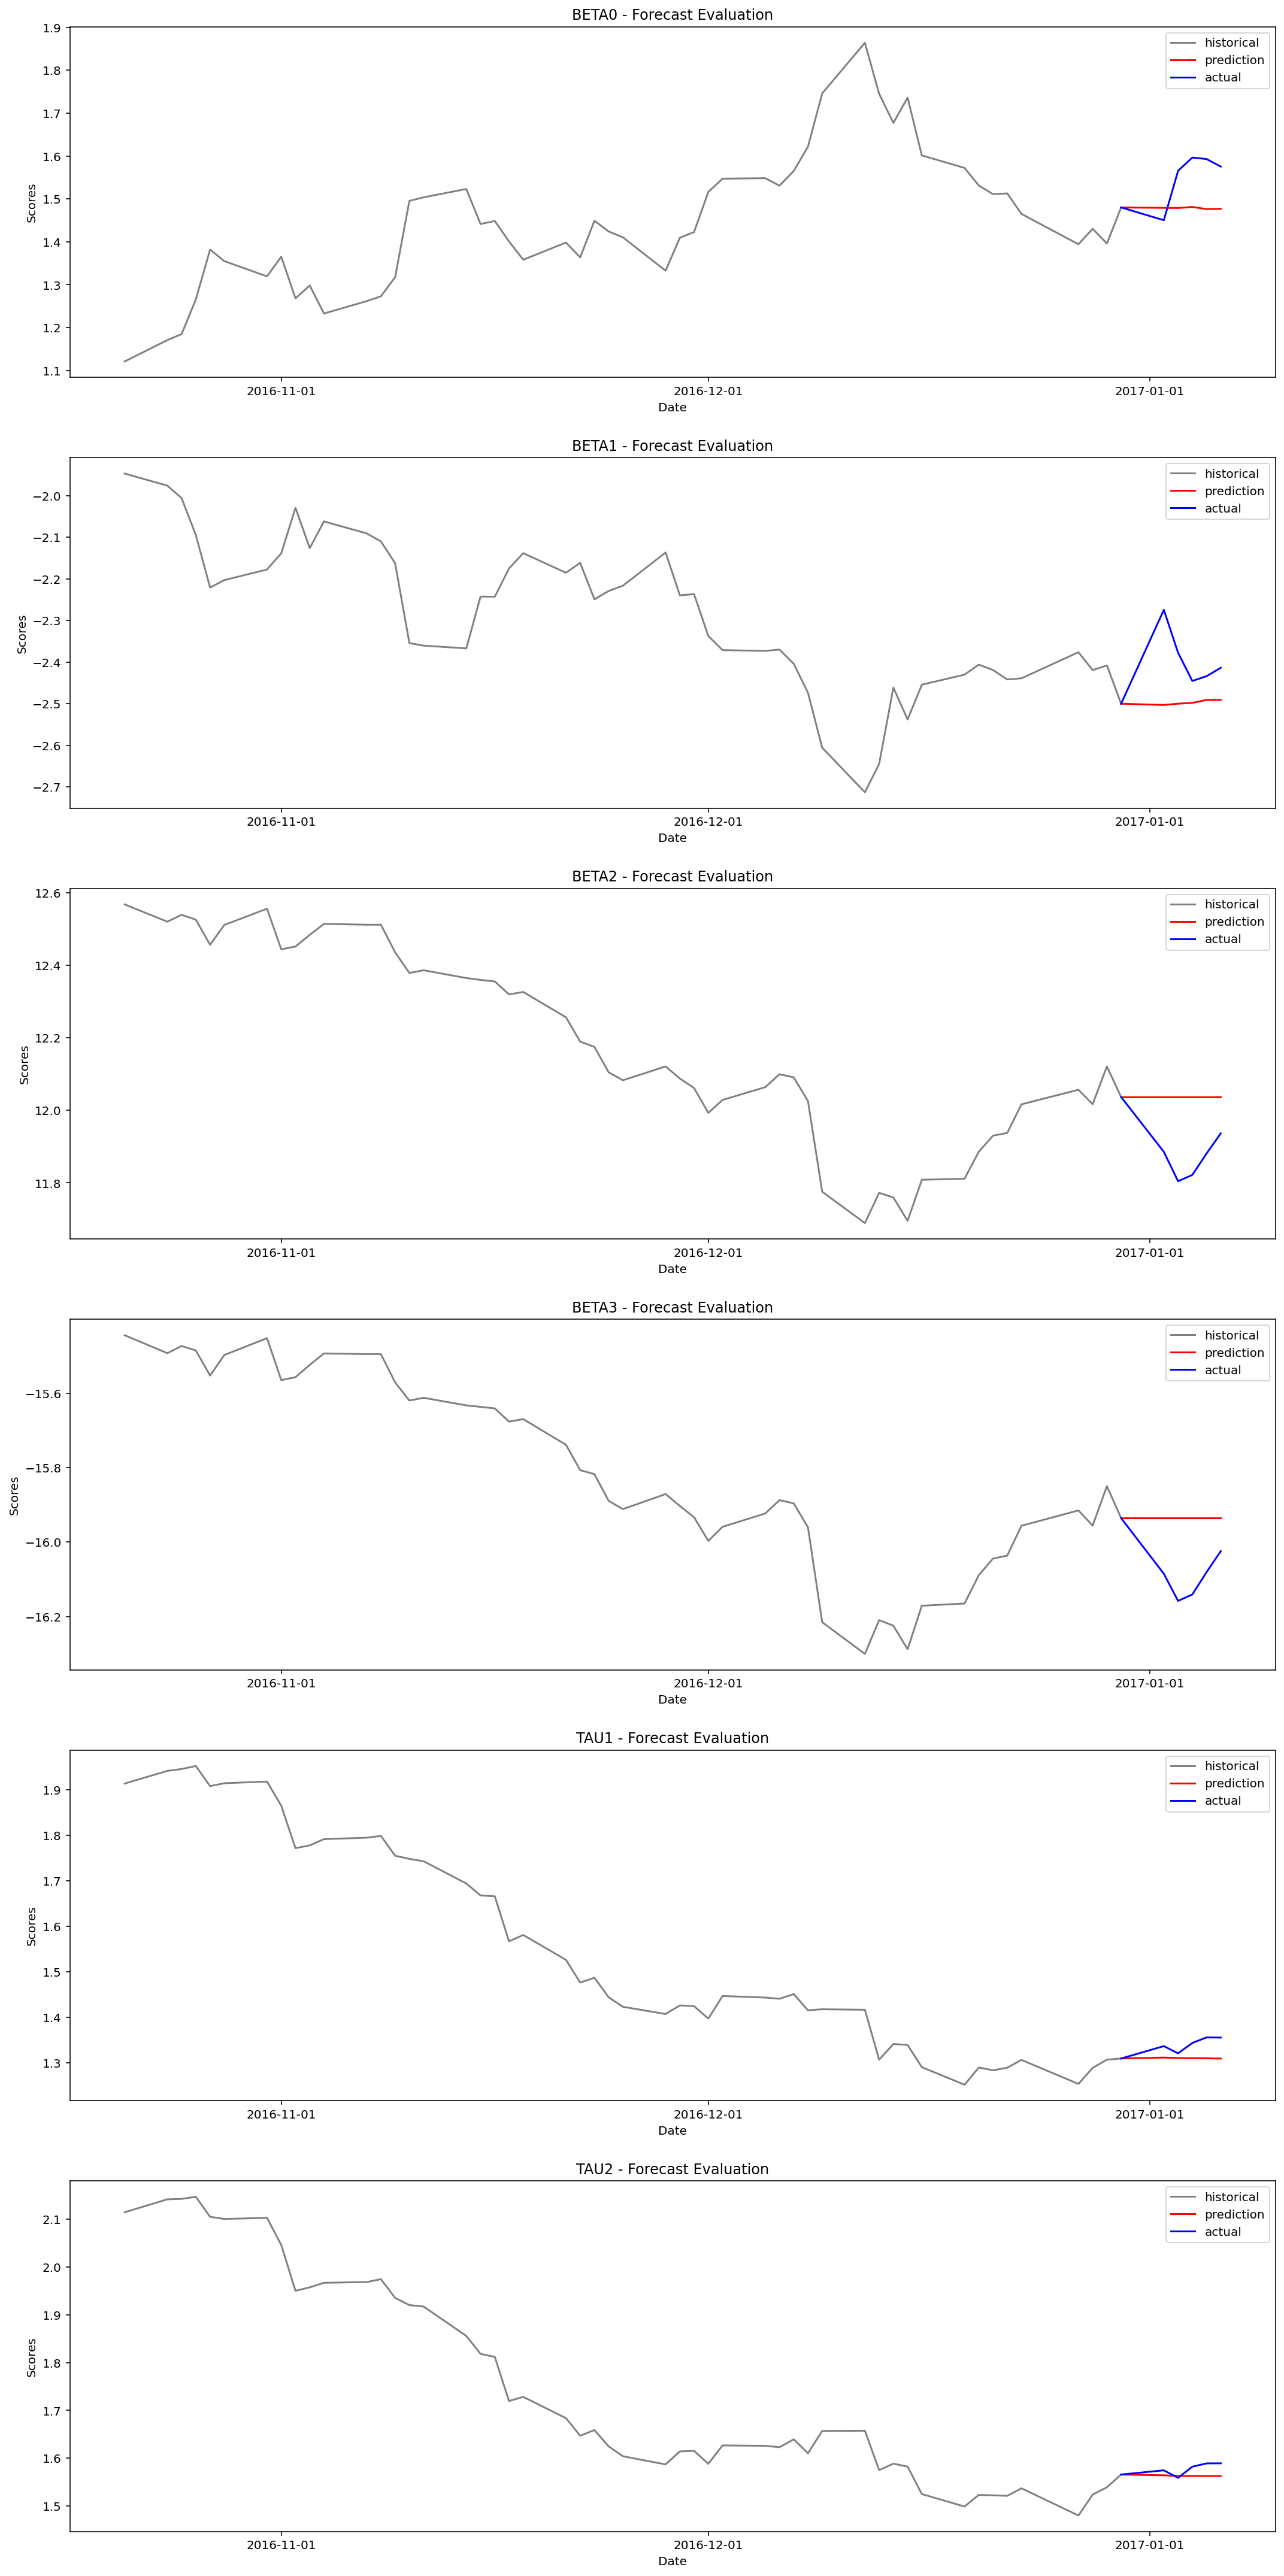

In [49]:
days_hist = 50

fig, ax = plt.subplots(cols_len, 1, figsize = (15,5*cols_len))

chart_hist = train.iloc[-days_hist:,:]
chart_pred = pd.concat([train.iloc[-1:], pred_scores], axis =0)
chart_act = pd.concat([train.iloc[-1:], test[:steps]], axis = 0)

for i,j in enumerate (cols):
    # Plots --------------------------------------------------------------
    ax[i].plot (chart_hist[j], c="grey", label = "historical")
    ax[i].plot (chart_pred[j], c="red", label = "prediction")
    ax[i].plot (chart_act[j], c="blue", label = "actual")

    # Format -------------------------------------------------------------
    ax[i].set_title (j+" - Forecast Evaluation")
    ax[i].set_xlabel ("Date")
    ax[i].set_ylabel ("Scores")

    ax[i].xaxis.set_major_formatter(days_fmt)
    ax[i].xaxis.set_major_locator(months)
    ax[i].legend()

plt.tight_layout(h_pad=2.0)
plt.show()

In [50]:
maturities = ["1Y", "5Y", "10Y"]

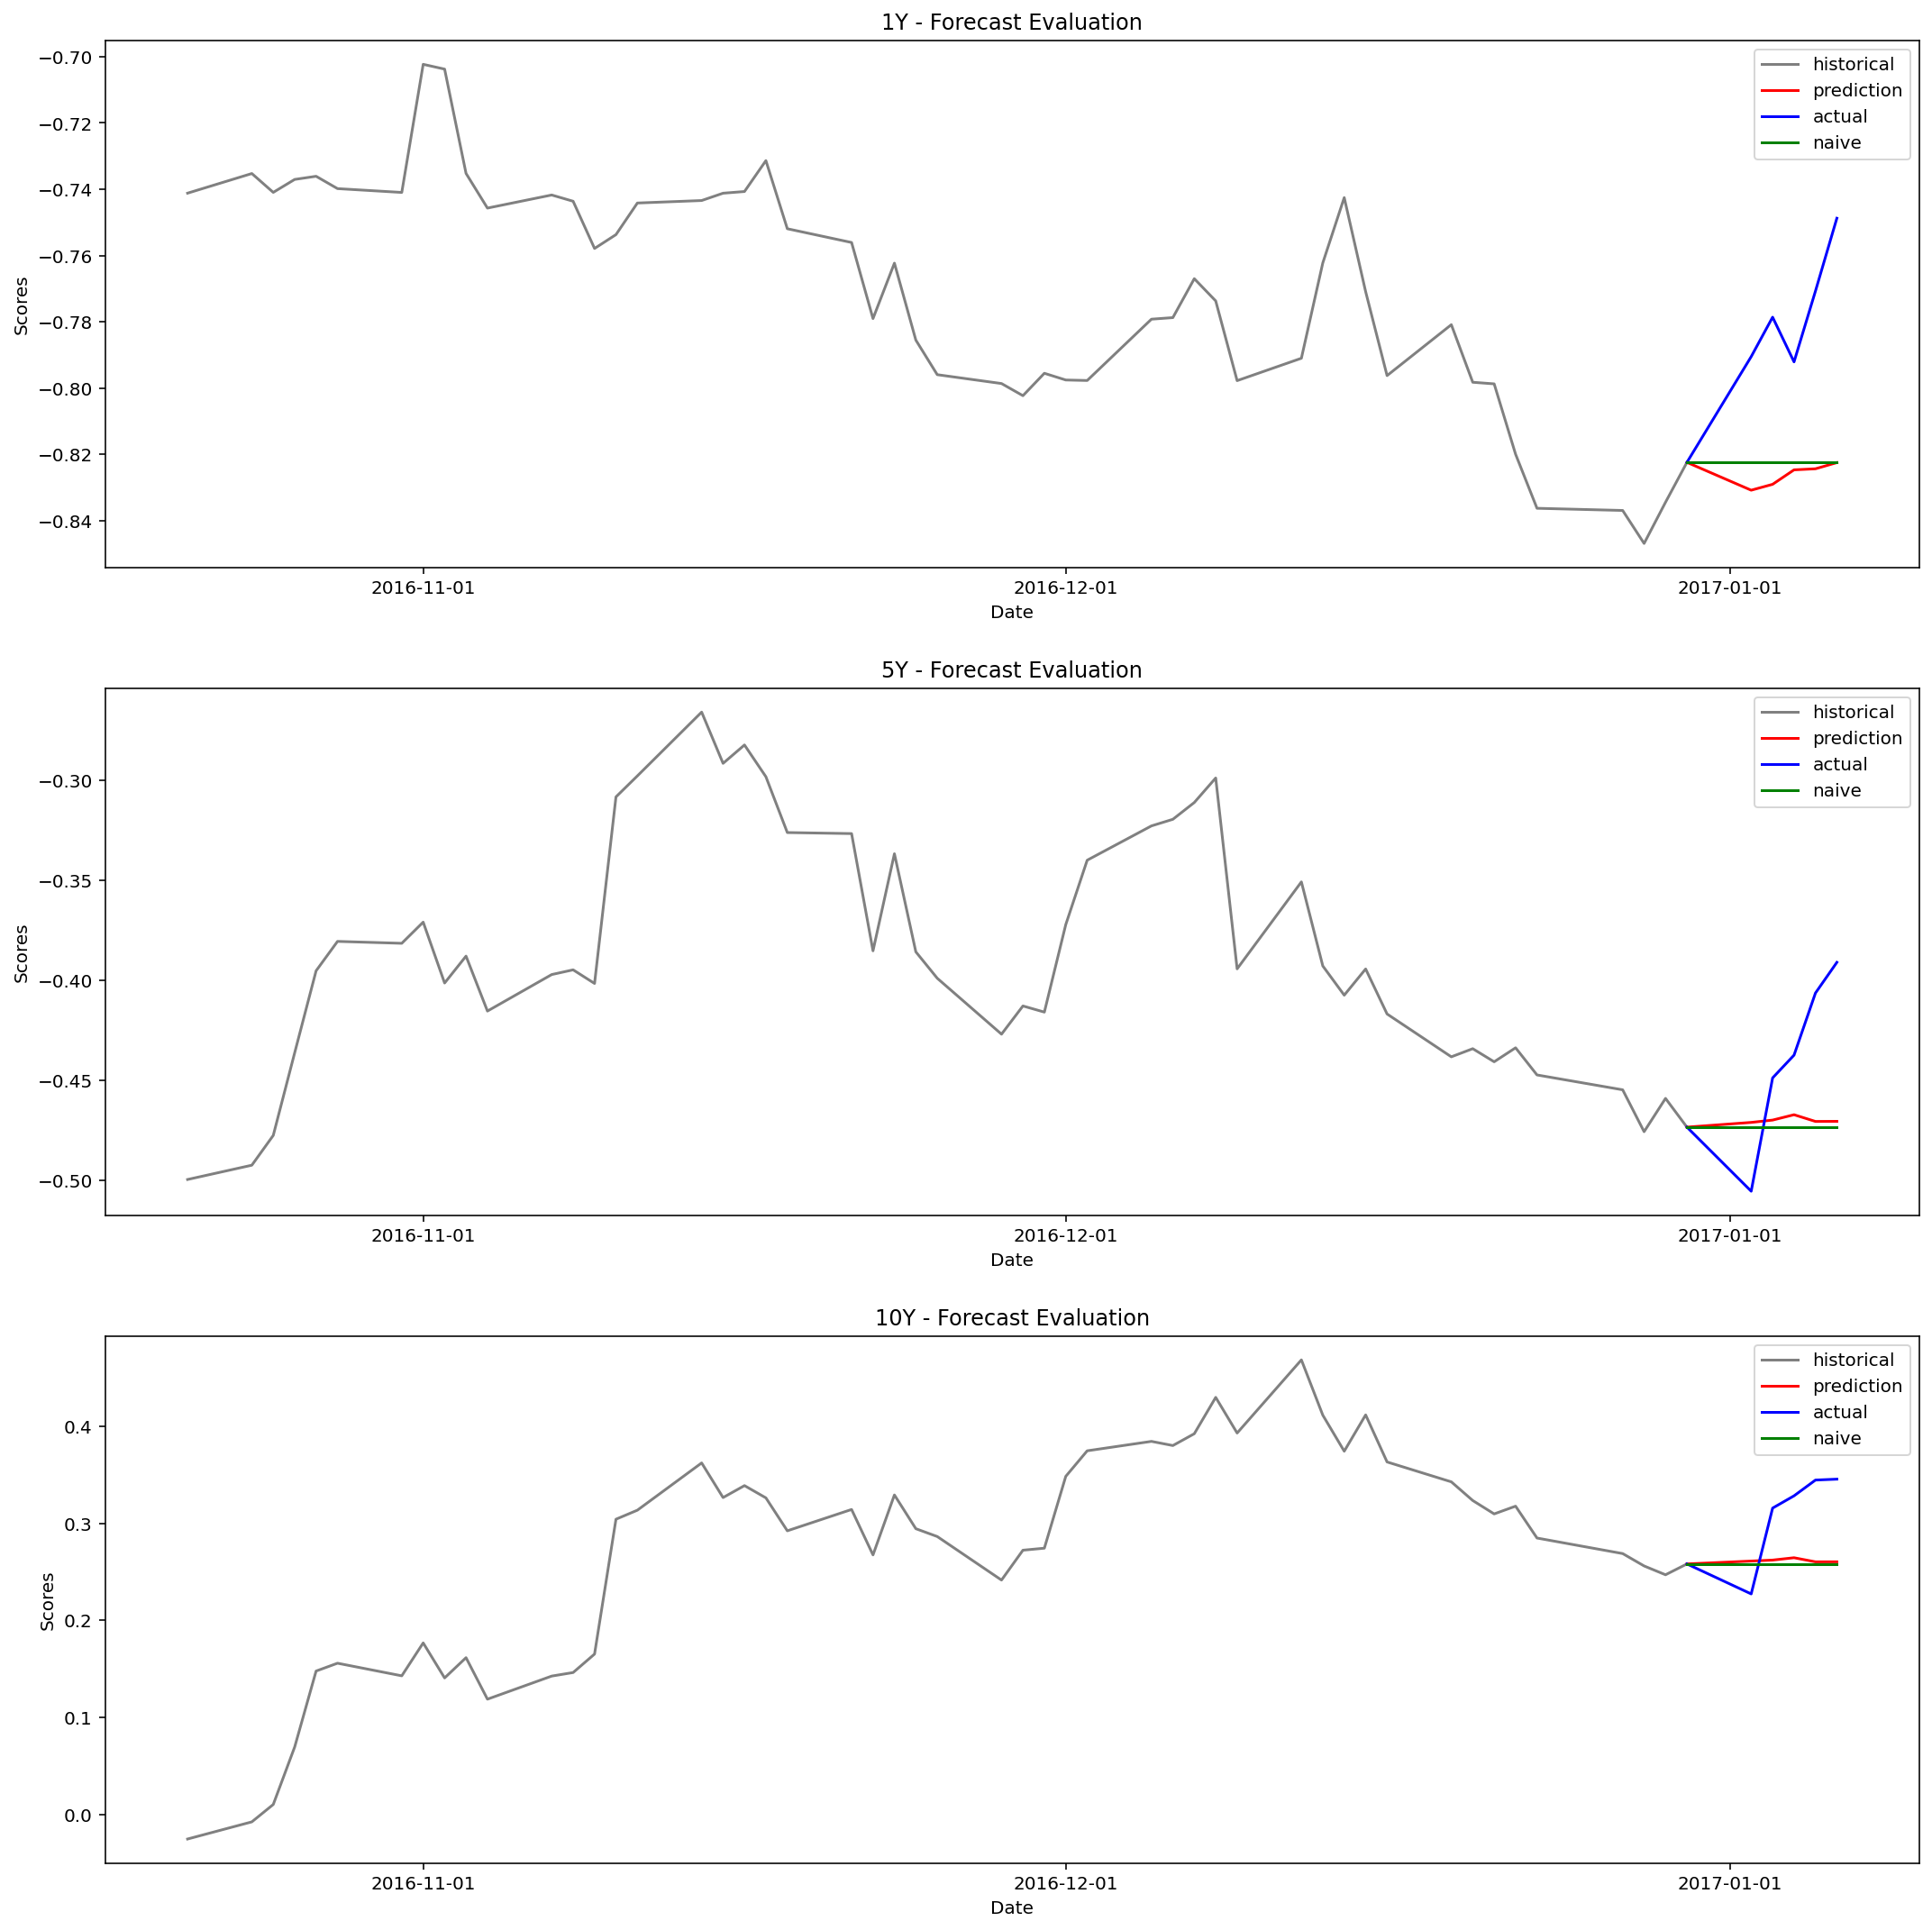

In [51]:
days_hist = 50

fig, ax = plt.subplots(len(maturities), 1, figsize = (15,5*len(maturities)))

chart_hist = spot_train.iloc[-days_hist:,:]
chart_pred = pd.concat([spot_train.iloc[-1:], pred_spot], axis =0)
chart_act = pd.concat([spot_train.iloc[-1:], spot_test[:steps]], axis = 0)
chart_naive = pd.concat([spot_train.iloc[-1:], naive], axis = 0)

for i,j in enumerate (maturities):
    # Plots --------------------------------------------------------------
    ax[i].plot (chart_hist[j], c="grey", label = "historical")
    ax[i].plot (chart_pred[j], c="red", label = "prediction")
    ax[i].plot (chart_act[j], c="blue", label = "actual")
    ax[i].plot (chart_naive[j], c="green", label = "naive")

    # Format -------------------------------------------------------------
    ax[i].set_title (j+" - Forecast Evaluation")
    ax[i].set_xlabel ("Date")
    ax[i].set_ylabel ("Scores")

    ax[i].xaxis.set_major_formatter(days_fmt)
    ax[i].xaxis.set_major_locator(months)
    ax[i].legend()

plt.tight_layout(h_pad=2.0)
plt.show()

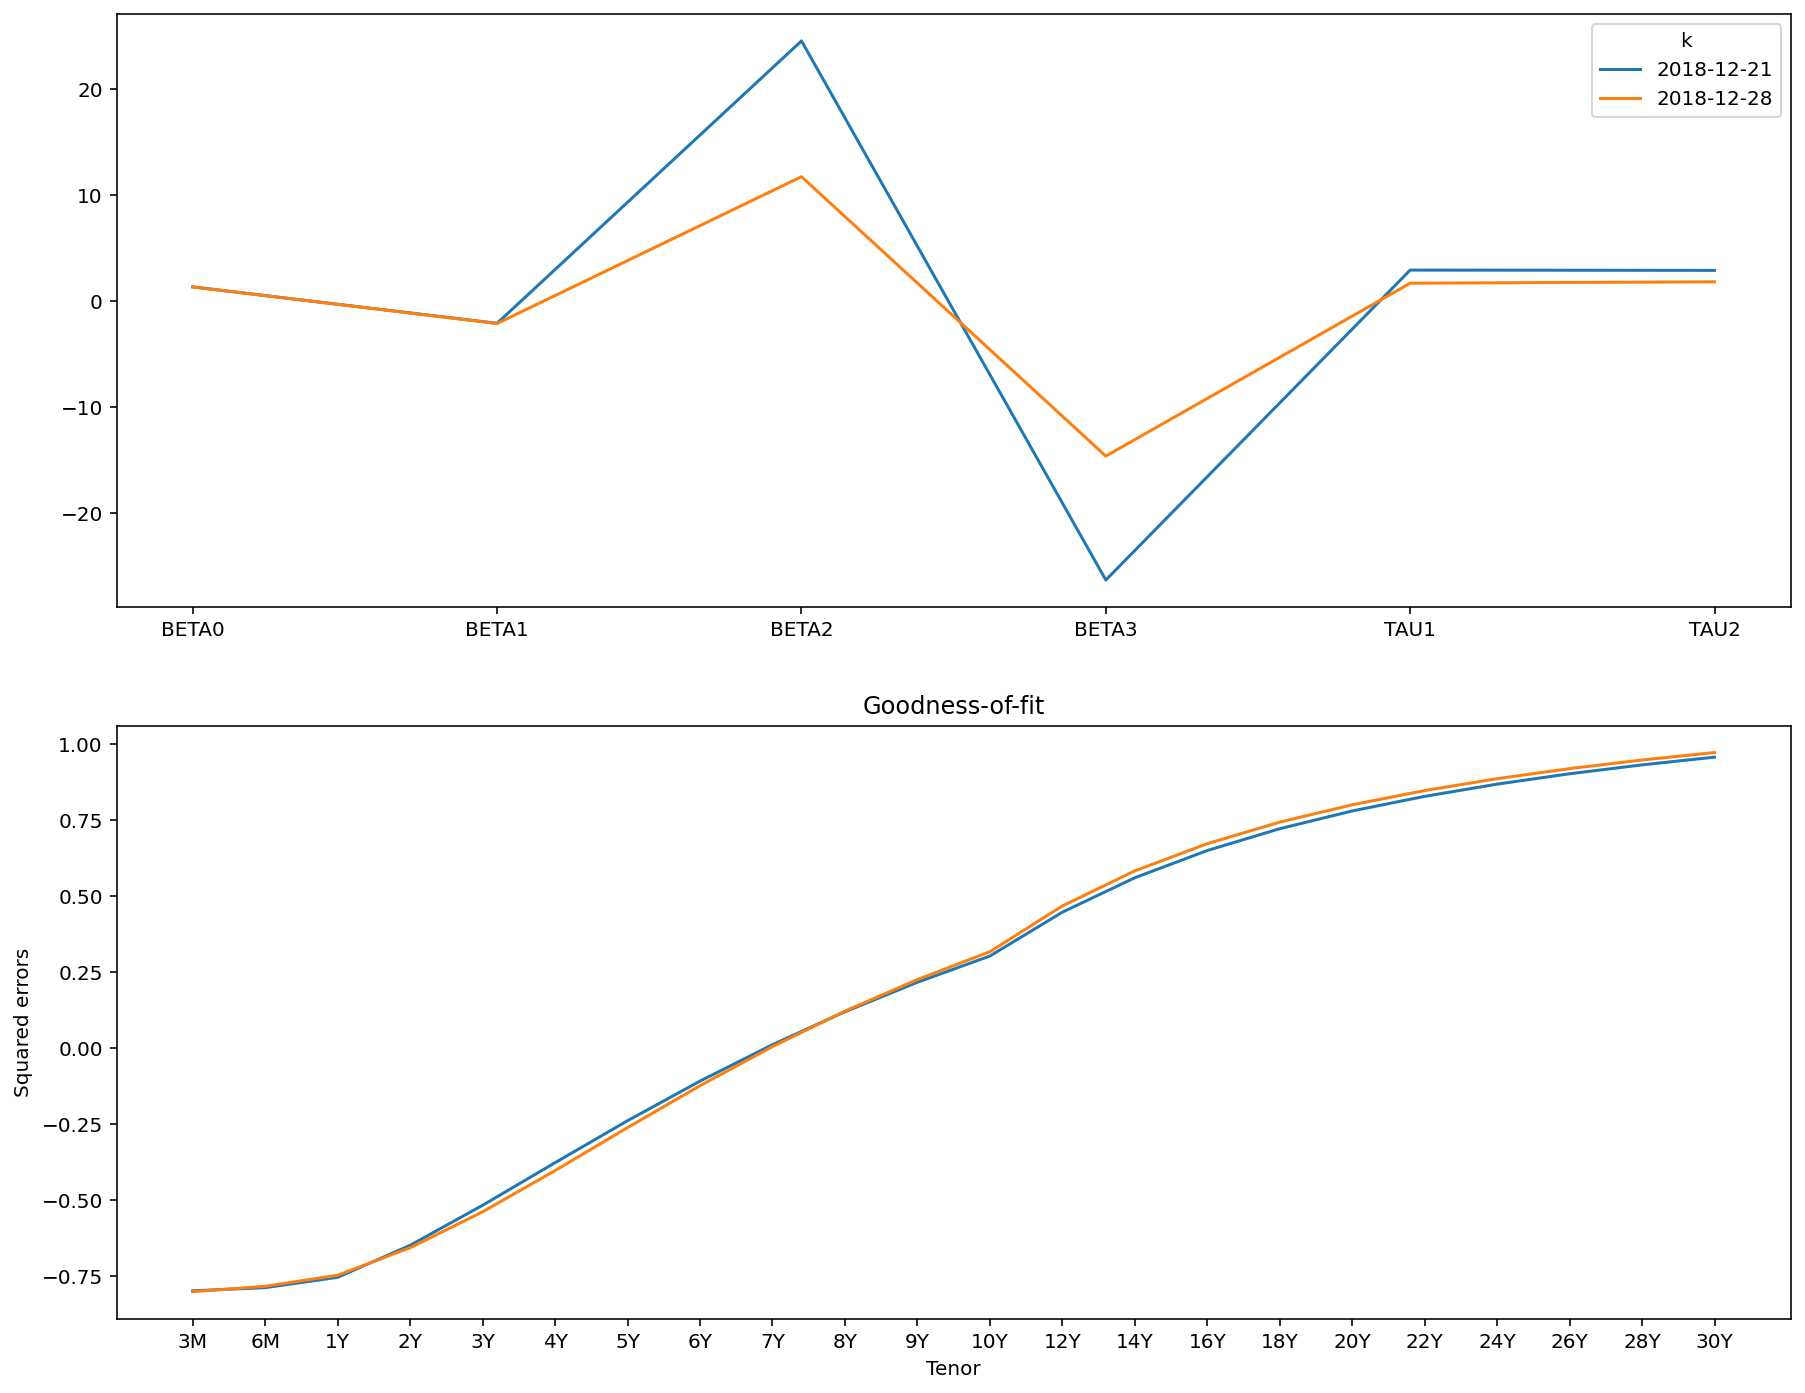

In [52]:
date_1 = "2018-12-21"
date_2 = "2018-12-28"

fig_3, ax = plt.subplots(2, 1, figsize = (15,12))

ax[0].plot(ns.loc[date_1][:6], label = date_1)
ax[0].plot(ns.loc[date_2][:6], label = date_2)

ax[1].plot(spot_test.loc[date_1], label = date_1)
ax[1].plot(spot_test.loc[date_2], label = date_2)


ax[1].set_xlabel("Tenor")
ax[1].set_ylabel("Squared errors")
ax[1].set_title(f"Goodness-of-fit")

ax[0].legend(title = "k")
plt.show()